In [0]:
from google.colab import files
uploaded = files.upload()

Saving students.csv to students.csv


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import io
df2 = pd.read_csv(io.BytesIO(uploaded['students.csv']))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
table=pd.read_csv('students.csv')
table

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [0]:
table.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

In [0]:
#There is 518 female and 482 male students out of 1000 students'data given 

In [0]:
#First analysinig the situation only for gender male. storing it to male_data
male_data=table[table.gender=='male'].head(1000)
male_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
10,male,group C,associate's degree,standard,none,58,54,52
...,...,...,...,...,...,...,...,...
985,male,group A,high school,standard,none,57,51,54
987,male,group E,some high school,standard,completed,81,75,76
990,male,group E,high school,free/reduced,completed,86,81,75
994,male,group A,high school,standard,none,63,63,62


AxesSubplot(0.125,0.125;0.775x0.755)


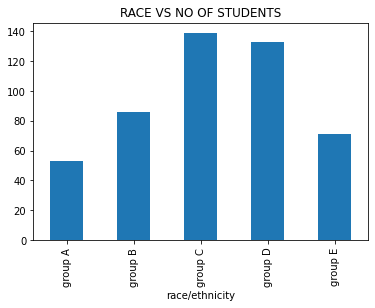

In [0]:
print(male_data.groupby('race/ethnicity').gender.count().plot(kind='bar',title='RACE VS NO OF STUDENTS'))
# print(male_data.groupby('race/ethnicity').gender.agg('count'))

In [0]:

male_data[male_data['race/ethnicity'].str.contains('group A')].describe(include="all")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,53,53,53,53,53,53.000000,53.000000,53.000000
unique,1,1,6,2,2,NaN,NaN,NaN
top,male,group A,some high school,standard,none,NaN,NaN,NaN
freq,53,53,14,31,34,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,63.735849,61.735849,59.150943
std,NaN,NaN,NaN,NaN,NaN,14.520742,15.451103,15.137061
min,NaN,NaN,NaN,NaN,NaN,28.000000,23.000000,19.000000
25%,NaN,NaN,NaN,NaN,NaN,53.000000,51.000000,48.000000
50%,NaN,NaN,NaN,NaN,NaN,63.000000,61.000000,60.000000
75%,NaN,NaN,NaN,NaN,NaN,72.000000,72.000000,69.000000


In [0]:
#now from the graph it is clear that most no of males belong to group C followed by group D  while least is for group A 
#It almost increases linearly from group A to group C and then decreases
relation = pd.crosstab(male_data['race/ethnicity'],male_data['parental level of education'])
(relation)


parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
race/ethnicity,,,,,,
group A,8,9,11,1,10,14
group B,18,9,20,1,22,16
group C,33,14,34,12,25,21
group D,26,15,27,8,32,25
group E,21,8,10,1,19,12


In [0]:
print("Masters -",relation['master\'s degree'].sum())
print("bachelors-",relation['bachelor\'s degree'].sum())
print("associates-",relation['associate\'s degree'].sum())
print("some college-", relation['some college'].sum())
print("high school",relation['high school'].sum())
print("some high school",relation['some high school'].sum())

#Here most number of parents have bachelors or some college level or high school education.Least is for masters

Masters - 23
bachelors- 55
associates- 106
some college- 108
high school 102
some high school 88


In [0]:
group_1=relation['associate\'s degree']

<Figure size 720x2880 with 0 Axes>

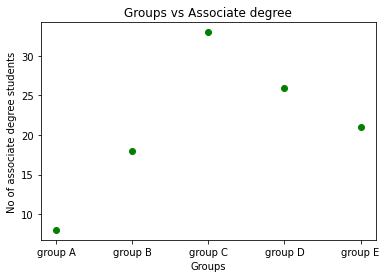

<Figure size 720x2880 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

#for associate degrees
index=relation.index
y1=relation['associate\'s degree']
# plt.subplot(1,2,1)
# figure, axes = plt.subplots(2,1)
plt.plot(index,y1,'go')
plt.xlabel('Groups')
plt.ylabel('No of associate degree students')
plt.title('Groups vs Associate degree')
# figure.tight_layout(pad=3.0)
plt.figure(figsize=(10,40))





In [0]:
# From the scatter plot it is clear from group A to group C assocaite degree increases linearly and thereafter it almost decreases linearly.Maximum for group C and least for Group

Text(0.5, 1.0, 'Groups vs bachelor degree')

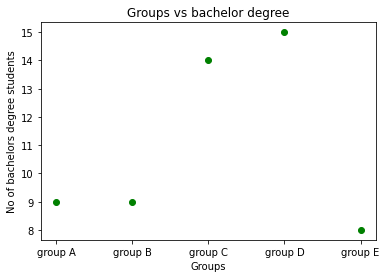

In [0]:
#for bachelor degrees
y2=relation['bachelor\'s degree']
# plt.subplot(1,2,2)
plt.plot(index,y2,'go')
plt.xlabel('Groups')
plt.ylabel('No of bachelors degree students')
plt.title('Groups vs bachelor degree')


Text(0, 0.5, 'No of masters degree students')

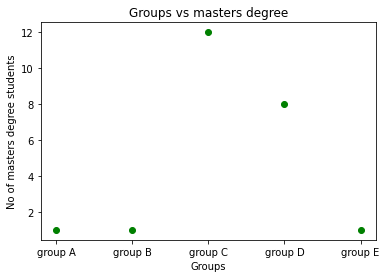

In [0]:
#for MASTER degrees
y3=relation['master\'s degree']
plt.plot(index,y3,'go')
plt.title('Groups vs masters degree')
plt.xlabel('Groups')
plt.ylabel('No of masters degree students')



In [0]:
#from th above three plots we understand that students belonging to group c have highest number of students with high degree.
#one of the anomaly in the graph is that for smaller degrees like bachelor and masters degree number of students in group D is less compared to c but it linearly increases when it comes to bachelors degree

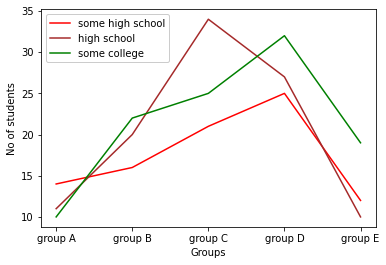

In [0]:
y4=relation['some high school']
plt.plot(index,y4,color='red',label='some high school')
plt.xlabel('Groups')

y5=relation['high school']
plt.plot(index,y5,color='brown',label='high school')
plt.xlabel('Groups')


y6=relation['some college']
plt.plot(index,y6,color='green',label='some college')
plt.xlabel('Groups')


plt.ylabel('No of students')
plt.legend(framealpha=1, frameon=True);
#note that for the given data set the most parents belong to this group and most are from group C and group D

In [0]:
#now from the current data the picture becomes more clear about their education statistics.
#for each degree there is approximately gradual increase in  no of students till group c and group d.and then after declines sharply,Which shows that 
#the male gender students belonging to middle class (C,D) are highly educated compared to higher or lower groups

In [0]:
#now since we have a overall picture of education of students of different groups.We will now go deeper into each groups and see their pattern(only for male gender)

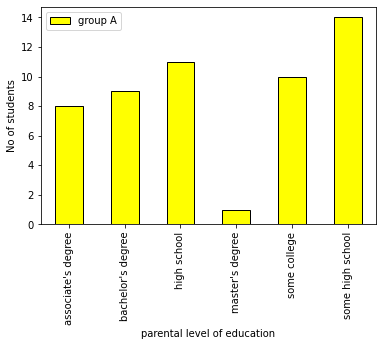

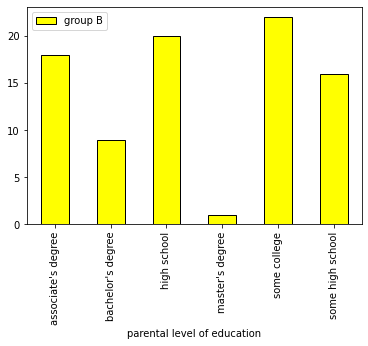

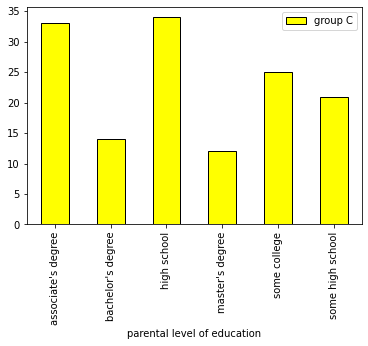

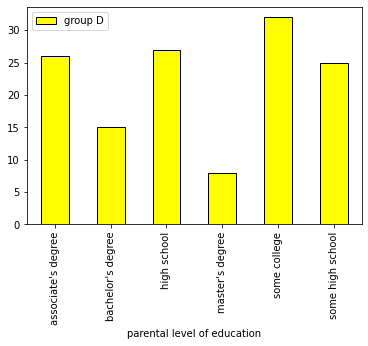

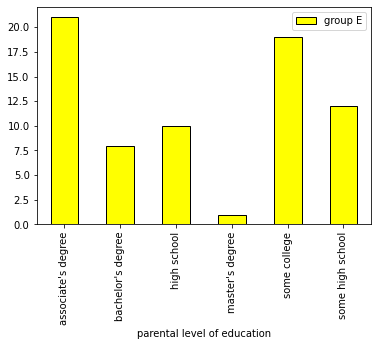

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

#Group  A
#least  educated among all (for every degree)
group_a=relation.iloc[0:1,:].head()
(group_a)
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
#group A
group_A_PLE=male_data[male_data['race/ethnicity'].str.contains('group A')]
group_A_PLE.groupby('parental level of education').gender.count().plot(kind='bar', color='yellow',edgecolor='black',label='group A')
plt.ylabel('No of students')
plt.legend()
plt.show()


#group B
group_b=relation.iloc[1:2,:].head()
group_B_PLE=male_data[male_data['race/ethnicity'].str.contains('group B')]
group_B_PLE.groupby('parental level of education').gender.count().plot(kind='bar', color='yellow',edgecolor='black',label='group B')
plt.legend()
plt.show()


#group c
group_c=relation.iloc[2:3,:].head()
group_C_PLE=male_data[male_data['race/ethnicity'].str.contains('group C')]
group_C_PLE.groupby('parental level of education').gender.count().plot(kind='bar', color='yellow',edgecolor='black',label='group C')
plt.legend()
plt.show()

#group d
group_d=relation.iloc[3:4,:].head()
group_D_PLE=male_data[male_data['race/ethnicity'].str.contains('group D')]
group_D_PLE.groupby('parental level of education').gender.count().plot(kind='bar', color='yellow',edgecolor='black',label='group D')
plt.legend()
plt.show()


#group e
group_e=relation.iloc[4:5,:].head()
group_E_PLE=male_data[male_data['race/ethnicity'].str.contains('group E')]
group_E_PLE.groupby('parental level of education').gender.count().plot(kind='bar', color='yellow',edgecolor='black',label='group E')
plt.legend()
plt.show()





In [0]:
#for group A male students maximum students have education from some high schools followed by some colleges. Only few percentage of the students have gone for higher degrees like masters 
#and bachelor




In [0]:
#to check the lunch patterns for each groups
lunch_var=pd.crosstab(male_data['race/ethnicity'],male_data['lunch'])

ind=lunch_var.index
l1=lunch_var['free/reduced']
plt.plot(ind,l1,color='black',label='free/reduced')
plt.xlabel('Groups')

l2=lunch_var['standard']
plt.plot(ind,l2,color='red',label='standard')
plt.xlabel('Groups')
plt.legend()


print(lunch_var)

NameError: ignored

In [0]:
#except group A all other group students have double the number of students in standard category compared to free/reduced category
#in case of free/reduced there is a initial linear dependence till group c and it finally declines almost linear

In [0]:
#to look at how the parental education affect lunch pattern

In [0]:
a=pd.crosstab(male_data['parental level of education'],male_data.lunch)
b=a.reindex(['master\'s degree', 'bachelor\'s degree', 'associate\'s degree','some college','high school', 'some high school'])
b
#For both the type of lunch the number of students increases linearly till associate degree and then decreases for free/reduced while remains almost same for standard type.
#this shows that 


lunch,free/reduced,standard
parental level of education,,
master's degree,10,13
bachelor's degree,22,33
associate's degree,41,65
some college,35,73
high school,33,69
some high school,25,63


In [0]:
|#To check dependence of lunch withrespect to different groups
#overall dependence on degrees There is almost a linear dependence for both types in degrees

group_a1=male_data[male_data['race/ethnicity'].str.contains('group A')]
a=pd.crosstab(group_a1['parental level of education'],group_a1.lunch)
b=a.reindex(['master\'s degree', 'bachelor\'s degree', 'associate\'s degree','some college','high school', 'some high school'])
print("FOR GROUP A\n")
print(b)
ind1=b.index

a1=b['free/reduced']
plt.plot(ind1,a1,color='black',label='GROUP_A DEGREE VS free/discount')
plt.xlabel('Degree')
plt.ylim([-2,20])
plt.xticks(ind1)
plt.legend()

a2=b['standard']
plt.plot(ind1,a2,color='purple',label='GROUP_A DEGREE VS standard')
plt.legend()


SyntaxError: ignored

In [0]:
#for Group A alone the students having free/discount  lunch increases from higher degree till bachelors'degree and then decreases and finally has a linear increase from college degree.
#One anomaly here is the peak seen at bachelor's degree while a decline seen at associate degree owning parents.Students from this group has standard lunch higher than free/reduced
#type except in some middle level courses where both are same.Similarily for standard type also the parents no increases almost linearly where there is small differences in between at the end.

# pd.crosstab(male_data['race/ethnicity'],male_data['lunch'])

FOR GROUP B

lunch                        free/reduced  standard
parental level of education                        
master's degree                         1         0
bachelor's degree                       6         3
associate's degree                      7        11
some college                            9        13
high school                             5        15
some high school                        2        14


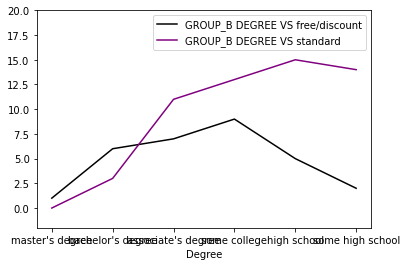

In [0]:
group_b1=male_data[male_data['race/ethnicity'].str.contains('group B')]
b=pd.crosstab(group_b1['parental level of education'],group_b1.lunch)
c=b.reindex(['master\'s degree', 'bachelor\'s degree', 'associate\'s degree','some college','high school', 'some high school'])
print("FOR GROUP B\n")
print(c)
ind1=c.index

a1=c['free/reduced']
plt.plot(ind1,a1,color='black',label='GROUP_B DEGREE VS free/discount')
plt.xlabel('Degree')
plt.ylim([-2,20])
plt.xticks(ind1)
plt.legend()

a2=c['standard']
plt.plot(ind1,a2,color='purple',label='GROUP_B DEGREE VS standard')
plt.legend()

FOR GROUP C

lunch                        free/reduced  standard
parental level of education                        
master's degree                         7         5
bachelor's degree                       4        10
associate's degree                     13        20
some college                            9        16
high school                            10        24
some high school                        9        12


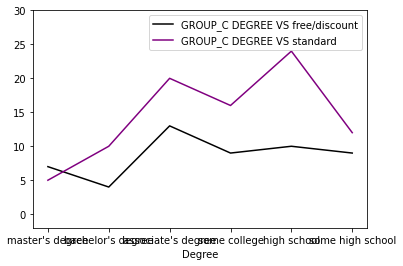

In [0]:
group_c1=male_data[male_data['race/ethnicity'].str.contains('group C')]
c=pd.crosstab(group_c1['parental level of education'],group_c1.lunch)
d=c.reindex(['master\'s degree', 'bachelor\'s degree', 'associate\'s degree','some college','high school', 'some high school'])
print("FOR GROUP C\n")
print(d)
ind1=d.index

a1=d['free/reduced']
plt.plot(ind1,a1,color='black',label='GROUP_C DEGREE VS free/discount')
plt.xlabel('Degree')
plt.ylim([-2,30])
plt.xticks(ind1)
plt.legend()

a2=d['standard']
plt.plot(ind1,a2,color='purple',label='GROUP_C DEGREE VS standard')
plt.legend()


FOR GROUP D

lunch                        free/reduced  standard
parental level of education                        
master's degree                         1         7
bachelor's degree                       8         7
associate's degree                      9        17
some college                            9        23
high school                            11        16
some high school                        6        19


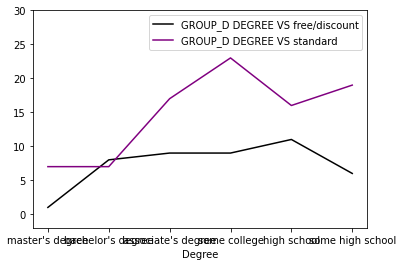

In [0]:
group_d1=male_data[male_data['race/ethnicity'].str.contains('group D')]
d=pd.crosstab(group_d1['parental level of education'],group_d1.lunch)
e=d.reindex(['master\'s degree', 'bachelor\'s degree', 'associate\'s degree','some college','high school', 'some high school'])
print("FOR GROUP D\n")
print(e)
ind1=e.index

a1=e['free/reduced']
plt.plot(ind1,a1,color='black',label='GROUP_D DEGREE VS free/discount')
plt.xlabel('Degree')
plt.ylim([-2,30])
plt.xticks(ind1)
plt.legend()

a2=e['standard']
plt.plot(ind1,a2,color='purple',label='GROUP_D DEGREE VS standard')
plt.legend()

FOR GROUP E

lunch                        free/reduced  standard
parental level of education                        
master's degree                         0         1
bachelor's degree                       2         6
associate's degree                      8        13
some college                            3        16
high school                             3         7
some high school                        2        10


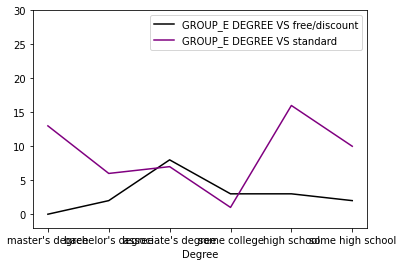

In [0]:
group_e1=male_data[male_data['race/ethnicity'].str.contains('group E')]
e=pd.crosstab(group_e1['parental level of education'],group_e1.lunch)
f=e.reindex(['master\'s degree', 'bachelor\'s degree', 'associate\'s degree','some college','high school', 'some high school'])
print("FOR GROUP E\n")
print(f)
ind1=f.index

a1=f['free/reduced']
plt.plot(ind1,a1,color='black',label='GROUP_E DEGREE VS free/discount')
plt.xlabel('Degree')
plt.ylim([-2,30])
plt.xticks(ind1)
plt.legend()

a2=e['standard']
plt.plot(ind1,a2,color='purple',label='GROUP_E DEGREE VS standard')
plt.legend()

In [0]:
z=pd.crosstab(male_data['race/ethnicity'],male_data['test preparation course'])
z

test preparation course,completed,none
race/ethnicity,,
group A,19,34
group B,33,53
group C,48,91
group D,38,95
group E,36,35


In [0]:
#for each group no of students who havent attended the course is double the no of students who have completed it.Also the number increase from group A to groupC
z.max()
#HIGHEST NO OF STUDENTS FOR BOTH BELONGS TO GROUP C
#THREE FOURTH OF STUDENTS IN GROUP A AND GROUP C HAVE NOT ATTENDED THE COURSE
#WHILE IN GROUP D MORE THAN 80 PERCENTAGE OF STUDENTS HAVE NOT ATTENDED
#FOR GROUP E THE NUMBER RATION IS 1:1
#THAT IS ALMOST EQUAL NO OF STUDENTS IS THERE IN BOTH SECTIONS

test preparation course
completed    48
none         95
dtype: int64

In [0]:
c=pd.crosstab(male_data['parental level of education'],male_data['test preparation course'])
d=c.reindex(['master\'s degree', 'bachelor\'s degree', 'associate\'s degree','some college','high school', 'some high school'])
d

test preparation course,completed,none
parental level of education,,
master's degree,6,17
bachelor's degree,24,31
associate's degree,40,66
some college,35,73
high school,27,75
some high school,42,46


In [0]:
#FOR MASTERS DEGREE ALMOST 75 PERCENTAGE OF MASTERS DEGREE AND HIGH SCHOOL PARENTS HAVE NOT ATTENDED

In [0]:
# import seaborn as sns
# sns.kdeplot(d['completed'],shade=True)
# sns.kdeplot(d['none'],shade=True)

Text(0, 0.5, 'no of students')

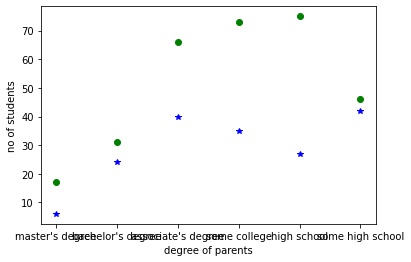

In [0]:
index=d.index
y2=d['completed']
y3=d['none']
plt.plot(index,y2,'b*')
plt.plot(index,y3,'go')
plt.xlabel('degree of parents')
plt.ylabel('no of students')


In [0]:
#from above two tables and scatter plot we can infer that for each group the no of students who have not attended the course is double (some have around 75%)than who have attended.
#Also as a whole for each parental education there is high value for the same section.But the difference is large in associate and college degrees (having more no of students)
#one difference that can be seen is for group E and for parents with high school education ,the values are almost same 

FOR GROUP A

test preparation course      completed  none
parental level of education                 
master's degree                      0     1
bachelor's degree                    4     5
associate's degree                   3     5
some college                         5     5
high school                          2     9
some high school                     5     9


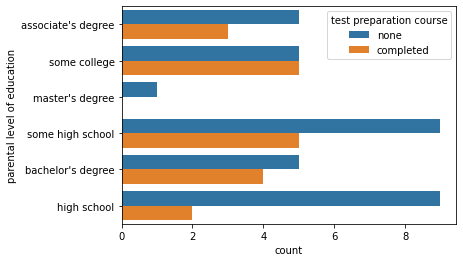

In [0]:
import seaborn as sns
group_z1=male_data[male_data['race/ethnicity'].str.contains('group A')]
a=pd.crosstab(group_z1['parental level of education'],group_z1['test preparation course'])
b=a.reindex(['master\'s degree', 'bachelor\'s degree', 'associate\'s degree','some college','high school', 'some high school'])
print("FOR GROUP A\n")
print(b)
sns.countplot(y="parental level of education" ,data=group_z1,hue="test preparation course")


FOR GROUP B

test preparation course      completed  none
parental level of education                 
master's degree                      0     1
bachelor's degree                    1     8
associate's degree                   7    11
some college                         9    13
high school                          6    14
some high school                    10     6


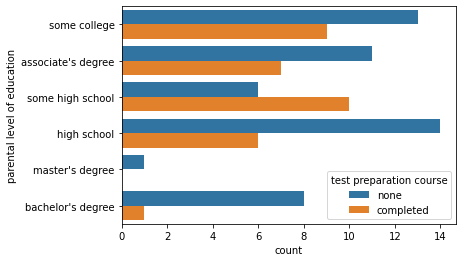

In [0]:
#group A have only one student whose parents have masters degree and he didnt attend the course
#from the table it is clear that  for degrees in the bottom no of students who have not attended the course is more
#while it is irregular in case of completed one


group_z2=male_data[male_data['race/ethnicity'].str.contains('group B')]
a=pd.crosstab(group_z2['parental level of education'],group_z2['test preparation course'])
b=a.reindex(['master\'s degree', 'bachelor\'s degree', 'associate\'s degree','some college','high school', 'some high school'])
print("FOR GROUP B\n")
print(b)
ax=sns.countplot(y="parental level of education" ,data=group_z2,hue="test preparation course")


In [0]:
group_z3=male_data[male_data['race/ethnicity'].str.contains('group C')]
a=pd.crosstab(group_z3['parental level of education'],group_z3['test preparation course'])
b=a.reindex(['master\'s degree', 'bachelor\'s degree', 'associate\'s degree','some college','high school', 'some high school'])
print("FOR GROUP C\n")
print(b)

FOR GROUP C

test preparation course      completed  none
parental level of education                 
master's degree                      5     7
bachelor's degree                    7     7
associate's degree                  12    21
some college                         5    20
high school                         10    24
some high school                     9    12


In [0]:
group_z4=male_data[male_data['race/ethnicity'].str.contains('group D')]
a=pd.crosstab(group_z4['parental level of education'],group_z4['test preparation course'])
b=a.reindex(['master\'s degree', 'bachelor\'s degree', 'associate\'s degree','some college','high school', 'some high school'])
print("FOR GROUP D\n")
print(b)

FOR GROUP D

test preparation course      completed  none
parental level of education                 
master's degree                      1     7
bachelor's degree                    6     9
associate's degree                   6    20
some college                        10    22
high school                          5    22
some high school                    10    15


In [0]:
group_z5=male_data[male_data['race/ethnicity'].str.contains('group E')]
a=pd.crosstab(group_z5['parental level of education'],group_z5['test preparation course'])
b=a.reindex(['master\'s degree', 'bachelor\'s degree', 'associate\'s degree','some college','high school', 'some high school'])
print("FOR GROUP E\n")
print(b)

FOR GROUP E

test preparation course      completed  none
parental level of education                 
master's degree                      0     1
bachelor's degree                    6     2
associate's degree                  12     9
some college                         6    13
high school                          4     6
some high school                     8     4


       math score  reading score  writing score
count  482.000000     482.000000     482.000000
mean    68.728216      65.473029      63.311203
std     14.356277      13.931832      14.113832
min     27.000000      23.000000      15.000000
25%     59.000000      56.000000      53.000000
50%     69.000000      66.000000      64.000000
75%     79.000000      75.000000      73.750000
max    100.000000     100.000000     100.000000
AxesSubplot(0.125,0.125;0.775x0.755)
\n\t\tINFERENECE MADE:\N1.Max students score around 70 marks in maths \n2.No of students scoring above and below mean value is decreasing


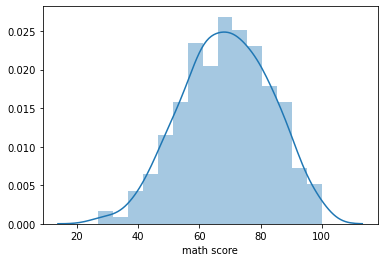

In [0]:
#Checking dependence of marks

score=male_data.iloc[:,5:8]
print(score.describe(include="all"))
print(sns.distplot(male_data['math score'],kde=True,hist=True))


In [0]:
print("\n\nINFERENECE MADE\n\n1.Max students score around 70 marks in maths \n2.No of students scoring above and below mean value is decreasing\n3.Minimum score is for writing which is 15 \nmaximum is 100")



INFERENECE MADE

1.Max students score around 70 marks in maths 
2.No of students scoring above and below mean value is decreasing
3.Minimum score is for writing which is 15 
maximum is 100


AxesSubplot(0.125,0.125;0.775x0.755)


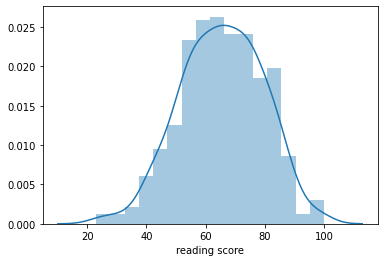

In [0]:
print(sns.distplot(male_data['reading score'],kde=True,hist=True))


AxesSubplot(0.125,0.125;0.775x0.755)


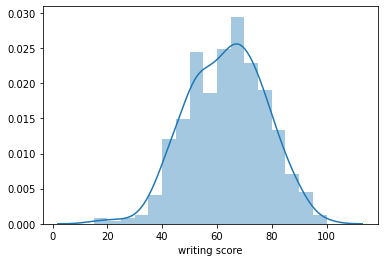

In [0]:
print(sns.distplot(male_data['writing score'],kde=True,hist=True))

In [0]:
#we have seen overall picture of the marks 
#Now analysing(maths score only) it within groups

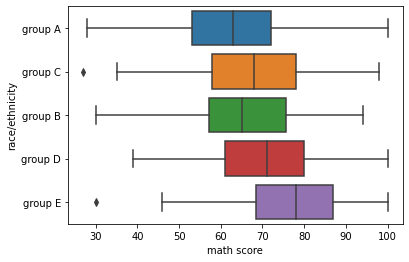

In [0]:
import seaborn as sns
sns.boxplot(y="race/ethnicity", x="math score", data=male_data)

In [0]:
print("1.group A has a wide range of students scoring marks and it averages around 65\n2.Group C students have marks in range from 35 to 95 but has higher mean than group A\n3.group E students eventhough not dispersed but have scored high marks with average around 80\n4.group A,C,D,E has scored highest while group A has lowest")

1.group A has a wide range of students scoring marks and it averages around 65
2.Group C students have marks in range from 35 to 95 but has higher mean than group A
3.group E students eventhough not dispersed but have scored high marks with average around 80
4.group A,C,D,E has scored highest while group A has lowest


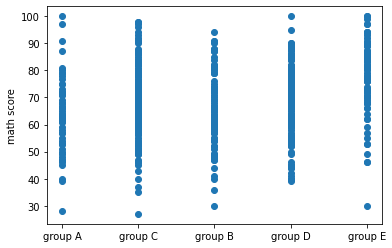

In [0]:

x=male_data['race/ethnicity']
y=male_data['math score']
plt.ylabel('math score')
plt.scatter(x,y)

In [0]:
#from the above scatter plot most of students in group have secured marks between 45 to 80
#students of group B have range from 60 to 75
#students of group C have a wide range from around 50 till 85
#group E students even though are not more dispersed but fall in higher marks range


			general trend of parental education


Text(0.5, 1.0, 'general trend on parental education')

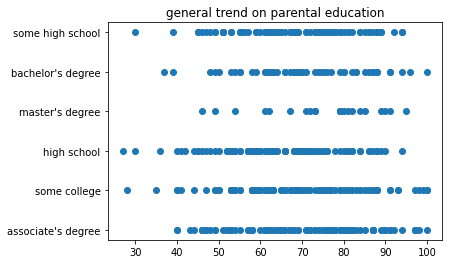

In [0]:
y=male_data['parental level of education']
x=male_data['math score']
print("\n\t\t\tgeneral trend of parental education")
plt.title('for all groups')
print(plt.scatter(x,y))
plt.title('general trend on parental education')


In [0]:
#The conclusion so far made is that group A students has least marks in maths while group C students performed better in the class as a whole while group E students was the topper with high average and individual marks
male_data['math score group']=pd.cut(male_data['math score'],range(10,110,15),right=False)
print(pd.crosstab(male_data['parental level of education'] ,male_data['math score group']))
print("\n1.For masters degree the students have score marks that is irregular ie msot of them have scored in 70 to 85 range which is close to class average\n2.while for associates and bachelors degree stduents have marks in range from 55 to 85\nhighest average is for master's degree  and the average decreases as parental level of education decreases")

math score group             [25, 40)  [40, 55)  [55, 70)  [70, 85)  [85, 100)
parental level of education                                                   
associate's degree                  0        18        32        36         19
bachelor's degree                   2         5        20        17         10
high school                         3        20        37        34          8
master's degree                     0         3         3        12          5
some college                        2        15        43        31         15
some high school                    2        13        33        29         11

1.For masters degree the students have score marks that is irregular ie msot of them have scored in 70 to 85 range which is close to class average
2.while for associates and bachelors degree stduents have marks in range from 55 to 85
highest average is for master's degree  and the average decreases as parental level of education decreases


AxesSubplot(0.125,0.125;0.775x0.755)


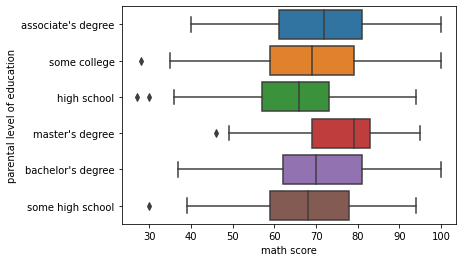

In [0]:
print(sns.boxplot(y="parental level of education", x="math score", data=male_data))


In [0]:
#to relate test course usefulness against marks in maths
pd.crosstab(male_data['test preparation course'],male_data['math score'])
math_scores=['27-45','45-60','960-75','75-90','90-100']
male_data['math score group']=pd.cut(male_data['math score'],range(10,110,15),right=False)
# male_data['math score group'].value_counts()
c=pd.crosstab(male_data['test preparation course'],male_data['math score group'])
c

math score group,"[25, 40)","[40, 55)","[55, 70)","[70, 85)","[85, 100)"
test preparation course,,,,,
completed,1,20,50,66,33
none,8,54,118,93,35


In [0]:
print("\n1.The students who haven't attended the course scored well \n2.The marks scored increasd when the student had attempted the course\n\n2.One anomaly here is the student who have completed the course scored less in range 85 to 100")



1.The students who haven't attended the course scored well 
2.The marks scored increasd when the student had attempted the course

2.One anomaly here is the student who have completed the course scored less in range 85 to 100


In [0]:
pd.crosstab(male_data['lunch'],male_data['math score'])
math_scores=['27-45','45-60','960-75','75-90','90-100']
male_data['math score group']=pd.cut(male_data['math score'],range(10,110,15),right=False)
# male_data['math score group'].value_counts()
c=pd.crosstab(male_data['lunch'],male_data['math score group'])
c

math score group,"[25, 40)","[40, 55)","[55, 70)","[70, 85)","[85, 100)"
lunch,,,,,
free/reduced,8,38,70,40,9
standard,1,36,98,119,59


In [0]:
#now to see the insights of the score of each student in various groups
#as a whole mean average of students in each subject is shown
#since we have seen overall picture of the marks obtained
#Now let us divide it among different groups

print("GROUP A")
group_a_score=male_data[male_data['race/ethnicity'].str.contains('group A')].iloc[:,5:6]
group_a_score.describe(include="all")


GROUP A


,math score
count,53.000000
mean,63.735849
std,14.520742
min,28.000000
25%,53.000000
50%,63.000000
75%,72.000000
max,100.000000


In [0]:
print("\n\nfor group A alone the mean is 64 marks for maths which is low compared to class average which is 69")



for group A alone the mean is 64 marks for maths which is low compared to class average which is 69


for group A the variation of marks with respect to groups


Text(0.5, 0, 'group A')

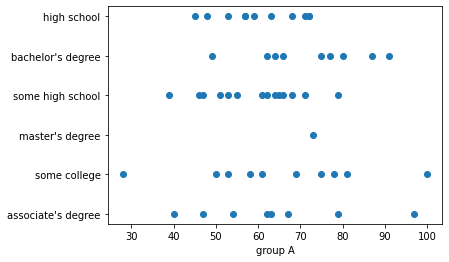

In [0]:
#anlaysing only for group A math score
#mean is around 64
c1=male_data[male_data['race/ethnicity'].str.contains('group A')]
y=c1['parental level of education']
x=c1['math score']
print("for group A the variation of marks with respect to groups")
print(plt.scatter(x,y))
plt.xlabel('group A')

In [0]:
male_data['math score group']=pd.cut(male_data['math score'],range(10,110,15),right=False)
pd.crosstab(c1['parental level of education'] ,c1['math score group'])
#in group A 

math score group,"[25, 40)","[40, 55)","[55, 70)","[70, 85)","[85, 100)"
parental level of education,,,,,
associate's degree,0,3,3,1,1
bachelor's degree,0,1,3,3,2
high school,0,3,5,3,0
master's degree,0,0,0,1,0
some college,1,2,3,3,0
some high school,1,4,7,2,0


In [0]:
print("for group A the average is around 64 as a whole\n2.No of students whose parents are in associate ,bachelors and high school performed well")

for group A the average is around 64 as a whole
2.No of students whose parents are in associate ,bachelors and high school performed well


In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group A')]

pd.crosstab(c1['test preparation course'],c1['math score'])
male_data['math score group']=pd.cut(c1['math score'],range(10,110,15),right=False)
# male_data['math score group'].value_counts()
print("GROUP A")
pd.crosstab(c1['test preparation course'],c1['math score group'])


GROUP A


math score group,"[25, 40)","[40, 55)","[55, 70)","[70, 85)","[85, 100)"
test preparation course,,,,,
completed,0,5,4,7,2
none,2,8,17,6,1


In [0]:

c1=male_data[male_data['race/ethnicity'].str.contains('group A')]
c1['math score group']=pd.cut(c1['math score'],range(10,110,15),right=False)
d1=c1[c1['parental level of education'].str.contains('associate\'s degree')]
d2=d1[d1['test preparation course'].str.contains('none')]
(d2).head(100)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
3,male,group A,associate's degree,free/reduced,none,47,57,44,"[40, 55)"
62,male,group A,associate's degree,free/reduced,none,62,61,55,"[55, 70)"
112,male,group A,associate's degree,standard,none,54,53,47,"[40, 55)"
356,male,group A,associate's degree,standard,none,63,61,61,"[55, 70)"
936,male,group A,associate's degree,standard,none,67,57,53,"[55, 70)"


In [0]:
print("For group A students whose parents have associate degree education and havent done test preparation course their average lies between 55 to 70\n2.For students whose lunch have standard also have better average than one with discounted food")

For group A students whose parents have associate degree education and havent done test preparation course their average lies between 55 to 70
2.For students whose lunch have standard also have better average than one with discounted food


In [0]:
print(d2['math score group'].value_counts())
print(d2['math score'].mean())
print("clearly most students lie in group 55 to 60")

[55, 70)     3
[40, 55)     2
[85, 100)    0
[70, 85)     0
[25, 40)     0
[10, 25)     0
Name: math score group, dtype: int64
58.6
clearly most students lie in group 55 to 60


In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group A')]
c1['math score group']=pd.cut(c1['math score'],range(10,110,15),right=False)
c1
d1=c1[c1['parental level of education'].str.contains('associate\'s degree')]
d2=d1[d1['test preparation course'].str.contains('completed')]
d2.head(100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
489,male,group A,associate's degree,free/reduced,completed,79,82,82,"[70, 85)"
539,male,group A,associate's degree,standard,completed,97,92,86,"[85, 100)"
575,male,group A,associate's degree,free/reduced,completed,40,55,53,"[40, 55)"


In [0]:
print(d2['math score group'].value_counts())
print(d2['math score'].mean())
print("The mean average of marks is 72 for maths and students with standard food scores better again")

[85, 100)    1
[70, 85)     1
[40, 55)     1
[55, 70)     0
[25, 40)     0
[10, 25)     0
Name: math score group, dtype: int64
72.0
The mean average of marks is 72 for maths and students with standard food scores better again


In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group A')]
c1['math score group']=pd.cut(c1['math score'],range(10,110,15),right=False)
c1
d1=c1[c1['parental level of education'].str.contains('master\'s degree')]
d2=d1[d1['test preparation course'].str.contains('completed')]
(d2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group


In [0]:
print("No student belong to this category")

No student belong to this category


In [0]:
d2=d1[d1['test preparation course'].str.contains('none')]
(d2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
25,male,group A,master's degree,free/reduced,none,73,74,72,"[70, 85)"


In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group A')]
c1['math score group']=pd.cut(c1['math score'],range(10,110,15),right=False)
c1
d1=c1[c1['parental level of education'].str.contains('bachelor\'s degree')]
d2=d1[d1['test preparation course'].str.contains('completed')]
(d2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
77,male,group A,bachelor's degree,standard,completed,80,78,81,"[70, 85)"
365,male,group A,bachelor's degree,free/reduced,completed,49,58,60,"[40, 55)"
464,male,group A,bachelor's degree,standard,completed,75,58,62,"[70, 85)"
702,male,group A,bachelor's degree,standard,completed,87,84,87,"[85, 100)"


In [0]:
print(d2['math score'].mean())
print(d2['math score group'].value_counts())

72.75
[70, 85)     2
[85, 100)    1
[40, 55)     1
[55, 70)     0
[25, 40)     0
[10, 25)     0
Name: math score group, dtype: int64


In [0]:
d2=d1[d1['test preparation course'].str.contains('none')]
d2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
151,male,group A,bachelor's degree,standard,none,77,67,68,"[70, 85)"
379,male,group A,bachelor's degree,standard,none,66,64,62,"[55, 70)"
571,male,group A,bachelor's degree,standard,none,91,96,92,"[85, 100)"
705,male,group A,bachelor's degree,free/reduced,none,62,72,65,"[55, 70)"
832,male,group A,bachelor's degree,standard,none,64,60,58,"[55, 70)"


In [0]:
print(d2['math score group'].value_counts())
print(d2['math score'].mean())


[55, 70)     3
[85, 100)    1
[70, 85)     1
[40, 55)     0
[25, 40)     0
[10, 25)     0
Name: math score group, dtype: int64
72.0


In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group A')]
c1['math score group']=pd.cut(c1['math score'],range(10,115,15),right=False)
c1
d1=c1[c1['parental level of education'].str.contains('some college')]
d2=d1[d1['test preparation course'].str.contains('completed')]
(d2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
13,male,group A,some college,standard,completed,78,72,70,"[70.0, 85.0)"
82,male,group A,some college,free/reduced,completed,50,47,54,"[40.0, 55.0)"
300,male,group A,some college,free/reduced,completed,81,78,81,"[70.0, 85.0)"
576,male,group A,some college,standard,completed,61,51,52,"[55.0, 70.0)"
623,male,group A,some college,standard,completed,100,96,86,NaN


In [0]:
d2['math score group'].value_counts()

[70, 85)     2
[55, 70)     1
[40, 55)     1
[85, 100)    0
[25, 40)     0
[10, 25)     0
Name: math score group, dtype: int64

In [0]:
d2=d1[d1['test preparation course'].str.contains('none')]
(d2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
305,male,group A,some college,standard,none,69,67,69,"[55, 70)"
327,male,group A,some college,free/reduced,none,28,23,19,"[25, 40)"
401,male,group A,some college,standard,none,53,43,43,"[40, 55)"
769,male,group A,some college,free/reduced,none,58,60,57,"[55, 70)"
805,male,group A,some college,free/reduced,none,75,81,74,"[70, 85)"


In [0]:
d2['math score group'].value_counts()

[55, 70)     2
[70, 85)     1
[40, 55)     1
[25, 40)     1
[85, 100)    0
[10, 25)     0
Name: math score group, dtype: int64

In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group A')]
c1['math score group']=pd.cut(c1['math score'],range(10,110,15),right=False)
c1
d1=c1[c1['parental level of education'].str.contains('high school')]
d2=d1[d1['test preparation course'].str.contains('completed')]
(d2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
150,male,group A,some high school,standard,completed,62,67,69,"[55, 70)"
170,male,group A,high school,standard,completed,72,73,74,"[70, 85)"
250,male,group A,some high school,standard,completed,47,49,49,"[40, 55)"
296,male,group A,some high school,standard,completed,46,41,43,"[40, 55)"
467,male,group A,high school,free/reduced,completed,72,67,65,"[70, 85)"
943,male,group A,some high school,free/reduced,completed,61,62,61,"[55, 70)"
966,male,group A,some high school,standard,completed,66,68,64,"[55, 70)"


In [0]:
d2['math score group'].value_counts()

[55, 70)     3
[70, 85)     2
[40, 55)     2
[85, 100)    0
[25, 40)     0
[10, 25)     0
Name: math score group, dtype: int64

In [0]:
d2=d1[d1['test preparation course'].str.contains('none')]
(d2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
61,male,group A,some high school,free/reduced,none,39,39,34,"[25, 40)"
143,male,group A,high school,standard,none,57,43,47,"[55, 70)"
228,male,group A,some high school,free/reduced,none,68,72,64,"[55, 70)"
395,male,group A,high school,free/reduced,none,48,45,41,"[40, 55)"
428,male,group A,some high school,free/reduced,none,65,59,53,"[55, 70)"
444,male,group A,some high school,free/reduced,none,79,82,73,"[70, 85)"
483,male,group A,high school,standard,none,59,52,46,"[55, 70)"
506,male,group A,high school,standard,none,68,70,66,"[55, 70)"
511,male,group A,some high school,standard,none,64,50,43,"[55, 70)"
591,male,group A,some high school,standard,none,71,62,50,"[70, 85)"


In [0]:
d2['math score group'].value_counts()

[55, 70)     9
[40, 55)     5
[70, 85)     3
[25, 40)     1
[85, 100)    0
[10, 25)     0
Name: math score group, dtype: int64

In [0]:
print("GROUP B")
group_b_score=male_data[male_data['race/ethnicity'].str.contains('group B')].iloc[:,5:6]
group_b_score.describe(include="all")

GROUP B


,math score
count,86.000000
mean,65.930233
std,14.156928
min,30.000000
25%,57.250000
50%,65.000000
75%,75.750000
max,94.000000


for group A the variation of marks with respect to groups


Text(0.5, 0, 'group B')

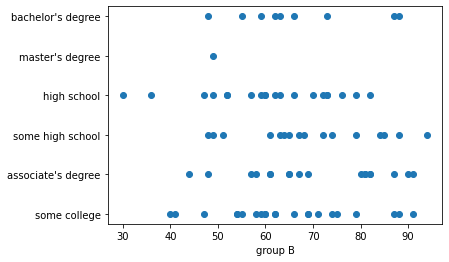

In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group B')]
y=c1['parental level of education']
x=c1['math score']
print("for group A the variation of marks with respect to groups")
print(plt.scatter(x,y))
plt.xlabel('group B')

In [0]:
male_data['math score group']=pd.cut(male_data['math score'],range(10,110,15),right=False)
(pd.crosstab(c1['parental level of education'] ,male_data['math score group']))
#in group B

math score group,"[25, 40)","[40, 55)","[55, 70)","[70, 85)","[85, 100)"
parental level of education,,,,,
associate's degree,0,2,8,5,3
bachelor's degree,0,1,5,1,2
high school,2,4,7,7,0
master's degree,0,1,0,0,0
some college,0,5,10,4,3
some high school,0,3,6,4,3


In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group B')]

pd.crosstab(c1['test preparation course'],c1['math score'])
male_data['math score group']=pd.cut(c1['math score'],range(10,110,15),right=False)
# male_data['math score group'].value_counts()
print("GROUP B")
print(pd.crosstab(c1['test preparation course'],c1['math score group']))


GROUP B
math score group         [25, 40)  [40, 55)  [55, 70)  [70, 85)  [85, 100)
test preparation course                                                   
completed                       0         3        12        11          7
none                            2        13        24        10          4


In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group B')]
c1['math score group']=pd.cut(c1['math score'],range(10,110,15),right=False)
d1=c1[c1['parental level of education'].str.contains('associate\'s degree')]
d2=d1[d1['test preparation course'].str.contains('none')]
(d2).head(100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
39,male,group B,associate's degree,free/reduced,none,57,56,57,"[55, 70)"
45,male,group B,associate's degree,standard,none,65,54,57,"[55, 70)"
68,male,group B,associate's degree,free/reduced,none,61,58,56,"[55, 70)"
75,male,group B,associate's degree,free/reduced,none,44,41,38,"[40, 55)"
221,male,group B,associate's degree,standard,none,87,85,73,"[85, 100)"
295,male,group B,associate's degree,free/reduced,none,67,62,60,"[55, 70)"
303,male,group B,associate's degree,standard,none,80,76,64,"[70, 85)"
333,male,group B,associate's degree,standard,none,90,78,81,"[85, 100)"
449,male,group B,associate's degree,standard,none,81,73,72,"[70, 85)"
565,male,group B,associate's degree,standard,none,48,43,45,"[40, 55)"


In [0]:
print(d2['math score group'].value_counts())
print(d2['math score'].mean())
print("clearly most students lie in group 60 to 70")

[55, 70)     5
[85, 100)    2
[70, 85)     2
[40, 55)     2
[25, 40)     0
[10, 25)     0
Name: math score group, dtype: int64
67.36363636363636
clearly most students lie in group 60 to 70


In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group B')]
c1['math score group']=pd.cut(c1['math score'],range(10,110,15),right=False)
c1
d1=c1[c1['parental level of education'].str.contains('associate\'s degree')]
d2=d1[d1['test preparation course'].str.contains('completed')]
d2.head(100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
121,male,group B,associate's degree,standard,completed,91,89,92,"[85, 100)"
160,male,group B,associate's degree,free/reduced,completed,82,78,74,"[70, 85)"
285,male,group B,associate's degree,standard,completed,81,82,82,"[70, 85)"
406,male,group B,associate's degree,standard,completed,65,65,63,"[55, 70)"
626,male,group B,associate's degree,free/reduced,completed,69,70,63,"[55, 70)"
838,male,group B,associate's degree,free/reduced,completed,58,57,53,"[55, 70)"
872,male,group B,associate's degree,standard,completed,82,84,78,"[70, 85)"


In [0]:
print(d2['math score group'].value_counts())
print(d2['math score'].mean())
print("clearly most students lie in group 55 to 60")

[70, 85)     3
[55, 70)     3
[85, 100)    1
[40, 55)     0
[25, 40)     0
[10, 25)     0
Name: math score group, dtype: int64
75.42857142857143
clearly most students lie in group 55 to 60


In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group B')]
c1['math score group']=pd.cut(c1['math score'],range(10,110,15),right=False)
c1
d1=c1[c1['parental level of education'].str.contains('master\'s degree')]
d2=d1[d1['test preparation course'].str.contains('completed')]
(d2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group


In [0]:
d2=d1[d1['test preparation course'].str.contains('none')]
(d2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
162,male,group B,master's degree,free/reduced,none,49,53,52,"[40, 55)"


In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group B')]
c1['math score group']=pd.cut(c1['math score'],range(10,110,15),right=False)
c1
d1=c1[c1['parental level of education'].str.contains('bachelor\'s degree')]
d2=d1[d1['test preparation course'].str.contains('completed')]
(d2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
551,male,group B,bachelor's degree,free/reduced,completed,87,90,88,"[85, 100)"


In [0]:
print(d2['math score'].mean())
print(d2['math score group'].value_counts())

87.0
[85, 100)    1
[70, 85)     0
[55, 70)     0
[40, 55)     0
[25, 40)     0
[10, 25)     0
Name: math score group, dtype: int64


In [0]:
d2=d1[d1['test preparation course'].str.contains('none')]
d2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
279,male,group B,bachelor's degree,free/reduced,none,73,56,57,"[70, 85)"
288,male,group B,bachelor's degree,free/reduced,none,88,75,76,"[85, 100)"
311,male,group B,bachelor's degree,standard,none,66,60,57,"[55, 70)"
318,male,group B,bachelor's degree,standard,none,63,71,69,"[55, 70)"
507,male,group B,bachelor's degree,free/reduced,none,55,59,54,"[55, 70)"
564,male,group B,bachelor's degree,free/reduced,none,48,51,46,"[40, 55)"
621,male,group B,bachelor's degree,free/reduced,none,62,63,56,"[55, 70)"
809,male,group B,bachelor's degree,standard,none,59,54,51,"[55, 70)"


In [0]:
print(d2['math score group'].value_counts())
print(d2['math score'].mean())

[55, 70)     5
[85, 100)    1
[70, 85)     1
[40, 55)     1
[25, 40)     0
[10, 25)     0
Name: math score group, dtype: int64
64.25


In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group B')]
c1['math score group']=pd.cut(c1['math score'],range(10,115,15),right=False)
c1
d1=c1[c1['parental level of education'].str.contains('some college')]
d2=d1[d1['test preparation course'].str.contains('completed')]
(d2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
43,male,group B,some college,free/reduced,completed,59,65,66,"[55, 70)"
274,male,group B,some college,standard,completed,88,85,76,"[85, 100)"
570,male,group B,some college,standard,completed,71,75,70,"[70, 85)"
684,male,group B,some college,standard,completed,62,66,68,"[55, 70)"
749,male,group B,some college,standard,completed,87,84,86,"[85, 100)"
759,male,group B,some college,standard,completed,69,77,77,"[55, 70)"
843,male,group B,some college,free/reduced,completed,74,77,76,"[70, 85)"
919,male,group B,some college,standard,completed,91,96,91,"[85, 100)"
976,male,group B,some college,free/reduced,completed,60,62,60,"[55, 70)"


In [0]:
d2['math score group'].value_counts()

[55, 70)     4
[85, 100)    3
[70, 85)     2
[40, 55)     0
[25, 40)     0
[10, 25)     0
Name: math score group, dtype: int64

In [0]:
d2=d1[d1['test preparation course'].str.contains('none')]
(d2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
7,male,group B,some college,free/reduced,none,40,43,39,"[40, 55)"
26,male,group B,some college,standard,none,69,54,55,"[55, 70)"
100,male,group B,some college,standard,none,79,67,67,"[70, 85)"
157,male,group B,some college,free/reduced,none,60,60,60,"[55, 70)"
238,male,group B,some college,standard,none,54,52,51,"[40, 55)"
346,male,group B,some college,standard,none,62,61,57,"[55, 70)"
424,male,group B,some college,free/reduced,none,41,39,34,"[40, 55)"
461,male,group B,some college,free/reduced,none,54,54,45,"[40, 55)"
724,male,group B,some college,standard,none,47,43,41,"[40, 55)"
744,male,group B,some college,free/reduced,none,55,55,47,"[55, 70)"


In [0]:
d2['math score group'].value_counts()

[55, 70)     6
[40, 55)     5
[70, 85)     2
[85, 100)    0
[25, 40)     0
[10, 25)     0
Name: math score group, dtype: int64

In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group B')]
c1['math score group']=pd.cut(c1['math score'],range(10,110,15),right=False)
c1
d1=c1[c1['parental level of education'].str.contains('high school')]
d2=d1[d1['test preparation course'].str.contains('completed')]
(d2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
96,male,group B,some high school,standard,completed,65,66,62,"[55, 70)"
103,male,group B,high school,standard,completed,60,44,47,"[55, 70)"
136,male,group B,some high school,standard,completed,51,54,41,"[40, 55)"
215,male,group B,some high school,standard,completed,84,83,75,"[70, 85)"
219,male,group B,some high school,standard,completed,61,56,56,"[55, 70)"
361,male,group B,some high school,standard,completed,85,84,78,"[85, 100)"
413,male,group B,some high school,standard,completed,63,67,67,"[55, 70)"
459,male,group B,high school,standard,completed,72,65,68,"[70, 85)"
480,male,group B,high school,standard,completed,73,71,68,"[70, 85)"
488,male,group B,some high school,standard,completed,64,53,57,"[55, 70)"


In [0]:
d2['math score group'].value_counts()

[70, 85)     6
[55, 70)     5
[40, 55)     3
[85, 100)    2
[25, 40)     0
[10, 25)     0
Name: math score group, dtype: int64

In [0]:
d2=d1[d1['test preparation course'].str.contains('none')]
(d2)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
65,male,group B,some high school,standard,none,67,64,61,"[55, 70)"
81,male,group B,high school,free/reduced,none,49,45,45,"[40, 55)"
126,male,group B,some high school,standard,none,72,68,67,"[70, 85)"
146,male,group B,some high school,standard,none,88,84,75,"[85, 100)"
188,male,group B,some high school,free/reduced,none,48,52,45,"[40, 55)"
218,male,group B,high school,free/reduced,none,66,77,70,"[55, 70)"
398,male,group B,some high school,standard,none,74,63,57,"[70, 85)"
448,male,group B,high school,standard,none,47,46,42,"[40, 55)"
568,male,group B,high school,free/reduced,none,63,48,47,"[55, 70)"
596,male,group B,high school,free/reduced,none,30,24,15,"[25, 40)"


In [0]:
d2['math score group'].value_counts()

[55, 70)     8
[70, 85)     5
[40, 55)     4
[25, 40)     2
[85, 100)    1
[10, 25)     0
Name: math score group, dtype: int64

In [0]:
print("GROUP C ")
group_a_score=male_data[male_data['race/ethnicity'].str.contains('group C')].iloc[:,5:6]
group_a_score.describe(include="all")

GROUP C 


,math score
count,139.000000
mean,67.611511
std,14.090037
min,27.000000
25%,58.000000
50%,68.000000
75%,78.000000
max,98.000000


for group A the variation of marks with respect to groups


Text(0.5, 0, 'group C')

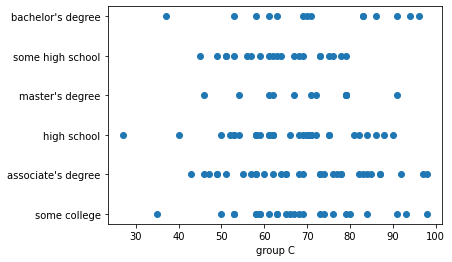

In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group C')]
y=c1['parental level of education']
x=c1['math score']
print("for group A the variation of marks with respect to groups")
print(plt.scatter(x,y))
plt.xlabel('group C')

In [0]:
male_data['math score group']=pd.cut(male_data['math score'],range(10,110,15),right=False)
pd.crosstab(c1['parental level of education'] ,male_data['math score group'])

math score group,"[25, 40)","[40, 55)","[55, 70)","[70, 85)","[85, 100)"
parental level of education,,,,,
associate's degree,0,6,11,10,6
bachelor's degree,1,1,4,4,4
high school,1,6,12,12,3
master's degree,0,2,3,6,1
some college,1,3,12,6,3
some high school,0,5,10,6,0


In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group C')]
pd.crosstab(c1['test preparation course'],c1['math score'])
male_data['math score group']=pd.cut(c1['math score'],range(10,110,15),right=False)
# male_data['math score group'].value_counts()
print("GROUP C")
pd.crosstab(c1['test preparation course'],c1['math score group'])

GROUP C


math score group,"[25, 40)","[40, 55)","[55, 70)","[70, 85)","[85, 100)"
test preparation course,,,,,
completed,0,10,14,15,9
none,3,13,38,29,8


In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group C')]
c1['math score group']=pd.cut(c1['math score'],range(10,110,15),right=False)
d1=c1[c1['parental level of education'].str.contains('associate\'s degree')]
d2=d1[d1['test preparation course'].str.contains('none')]
(d2).head(100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
10,male,group C,associate's degree,standard,none,58,54,52,"[55, 70)"
40,male,group C,associate's degree,free/reduced,none,55,61,54,"[55, 70)"
147,male,group C,associate's degree,free/reduced,none,73,68,66,"[70, 85)"
202,male,group C,associate's degree,standard,none,69,77,69,"[55, 70)"
231,male,group C,associate's degree,standard,none,46,43,42,"[40, 55)"
239,male,group C,associate's degree,standard,none,84,80,80,"[70, 85)"
245,male,group C,associate's degree,standard,none,85,76,71,"[85, 100)"
290,male,group C,associate's degree,standard,none,76,70,68,"[70, 85)"
317,male,group C,associate's degree,standard,none,83,72,78,"[70, 85)"
331,male,group C,associate's degree,standard,none,47,37,35,"[40, 55)"


In [0]:
print(d2['math score group'].value_counts())
print(d2['math score'].mean())

[55, 70)     7
[70, 85)     6
[85, 100)    4
[40, 55)     4
[25, 40)     0
[10, 25)     0
Name: math score group, dtype: int64
69.19047619047619


In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group C')]
c1['math score group']=pd.cut(c1['math score'],range(10,110,15),right=False)
c1
d1=c1[c1['parental level of education'].str.contains('associate\'s degree')]
d2=d1[d1['test preparation course'].str.contains('completed')]
d2.head(100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
93,male,group C,associate's degree,free/reduced,completed,43,45,50,"[40, 55)"
95,male,group C,associate's degree,free/reduced,completed,78,81,82,"[70, 85)"
185,male,group C,associate's degree,free/reduced,completed,65,67,65,"[55, 70)"
213,male,group C,associate's degree,free/reduced,completed,60,51,56,"[55, 70)"
257,male,group C,associate's degree,standard,completed,78,77,77,"[70, 85)"
328,male,group C,associate's degree,standard,completed,82,75,77,"[70, 85)"
381,male,group C,associate's degree,standard,completed,87,100,95,"[85, 100)"
393,male,group C,associate's degree,standard,completed,57,54,56,"[55, 70)"
536,male,group C,associate's degree,standard,completed,51,60,58,"[40, 55)"
619,male,group C,associate's degree,free/reduced,completed,65,73,68,"[55, 70)"


In [0]:
print(d2['math score group'].value_counts())
print(d2['math score'].mean())

[70, 85)     4
[55, 70)     4
[85, 100)    2
[40, 55)     2
[25, 40)     0
[10, 25)     0
Name: math score group, dtype: int64
69.75


In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group C')]
c1['math score group']=pd.cut(c1['math score'],range(10,110,15),right=False)
c1
d1=c1[c1['parental level of education'].str.contains('master\'s degree')]
d2=d1[d1['test preparation course'].str.contains('completed')]
(d2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
18,male,group C,master's degree,free/reduced,completed,46,42,46,"[40, 55)"
180,male,group C,master's degree,free/reduced,completed,62,68,75,"[55, 70)"
752,male,group C,master's degree,free/reduced,completed,79,77,75,"[70, 85)"
846,male,group C,master's degree,standard,completed,91,85,85,"[85, 100)"
940,male,group C,master's degree,free/reduced,completed,72,66,72,"[70, 85)"


In [0]:
d2=d1[d1['test preparation course'].str.contains('none')]
(d2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
382,male,group C,master's degree,free/reduced,none,79,81,71,"[70, 85)"
508,male,group C,master's degree,standard,none,79,78,77,"[70, 85)"
523,male,group C,master's degree,free/reduced,none,54,59,50,"[40, 55)"
549,male,group C,master's degree,standard,none,79,72,69,"[70, 85)"
557,male,group C,master's degree,free/reduced,none,61,67,66,"[55, 70)"
735,male,group C,master's degree,standard,none,67,57,59,"[55, 70)"
850,male,group C,master's degree,standard,none,71,67,67,"[70, 85)"


In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group C')]
c1['math score group']=pd.cut(c1['math score'],range(10,110,15),right=False)
c1
d1=c1[c1['parental level of education'].str.contains('bachelor\'s degree')]
d2=d1[d1['test preparation course'].str.contains('completed')]
(d2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
234,male,group C,bachelor's degree,standard,completed,83,82,84,"[70, 85)"
416,male,group C,bachelor's degree,standard,completed,71,74,68,"[70, 85)"
562,male,group C,bachelor's degree,standard,completed,96,90,92,"[85, 100)"
612,male,group C,bachelor's degree,standard,completed,94,90,91,"[85, 100)"
784,male,group C,bachelor's degree,standard,completed,91,81,79,"[85, 100)"
880,male,group C,bachelor's degree,standard,completed,63,64,66,"[55, 70)"
933,male,group C,bachelor's degree,free/reduced,completed,70,75,74,"[70, 85)"


In [0]:
print(d2['math score'].mean())
print(d2['math score group'].value_counts())

81.14285714285714
[85, 100)    3
[70, 85)     3
[55, 70)     1
[40, 55)     0
[25, 40)     0
[10, 25)     0
Name: math score group, dtype: int64


In [0]:

d2=d1[d1['test preparation course'].str.contains('none')]
d2


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
135,male,group C,bachelor's degree,standard,none,58,55,48,"[55, 70)"
270,male,group C,bachelor's degree,standard,none,69,63,61,"[55, 70)"
275,male,group C,bachelor's degree,standard,none,83,78,73,"[70, 85)"
367,male,group C,bachelor's degree,free/reduced,none,61,66,61,"[55, 70)"
426,male,group C,bachelor's degree,standard,none,86,83,86,"[85, 100)"
455,male,group C,bachelor's degree,free/reduced,none,37,56,47,"[25, 40)"
460,male,group C,bachelor's degree,free/reduced,none,53,58,55,"[40, 55)"


In [0]:
print(d2['math score group'].value_counts())
print(d2['math score'].mean())

[55, 70)     3
[85, 100)    1
[70, 85)     1
[40, 55)     1
[25, 40)     1
[10, 25)     0
Name: math score group, dtype: int64
63.857142857142854


In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group C')]
c1['math score group']=pd.cut(c1['math score'],range(10,115,15),right=False)
c1
d1=c1[c1['parental level of education'].str.contains('some college')]
d2=d1[d1['test preparation course'].str.contains('completed')]
(d2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
104,male,group C,some college,standard,completed,98,86,90,"[85, 100)"
261,male,group C,some college,standard,completed,79,79,78,"[70, 85)"
435,male,group C,some college,free/reduced,completed,50,48,53,"[40, 55)"
710,male,group C,some college,standard,completed,93,84,90,"[85, 100)"
930,male,group C,some college,free/reduced,completed,67,74,70,"[55, 70)"


In [0]:
d2['math score group'].value_counts()

[85, 100)    2
[70, 85)     1
[55, 70)     1
[40, 55)     1
[25, 40)     0
[10, 25)     0
Name: math score group, dtype: int64

In [0]:
d2=d1[d1['test preparation course'].str.contains('none')]
(d2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
4,male,group C,some college,standard,none,76,78,75,"[70, 85)"
52,male,group C,some college,standard,none,53,44,42,"[40, 55)"
204,male,group C,some college,standard,none,59,41,42,"[55, 70)"
211,male,group C,some college,free/reduced,none,35,28,27,"[25, 40)"
271,male,group C,some college,standard,none,58,49,42,"[55, 70)"
326,male,group C,some college,standard,none,61,61,62,"[55, 70)"
364,male,group C,some college,standard,none,59,60,58,"[55, 70)"
453,male,group C,some college,free/reduced,none,65,58,49,"[55, 70)"
469,male,group C,some college,standard,none,91,74,76,"[85, 100)"
482,male,group C,some college,free/reduced,none,68,68,61,"[55, 70)"


In [0]:
d2['math score group'].value_counts()

[55, 70)     11
[70, 85)      5
[40, 55)      2
[85, 100)     1
[25, 40)      1
[10, 25)      0
Name: math score group, dtype: int64

In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group C')]
c1['math score group']=pd.cut(c1['math score'],range(10,110,15),right=False)
c1
d1=c1[c1['parental level of education'].str.contains('high school')]
d2=d1[d1['test preparation course'].str.contains('completed')]
(d2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
49,male,group C,high school,standard,completed,82,84,82,"[70, 85)"
131,male,group C,some high school,free/reduced,completed,53,37,40,"[40, 55)"
166,male,group C,high school,free/reduced,completed,53,51,51,"[40, 55)"
184,male,group C,some high school,free/reduced,completed,45,52,49,"[40, 55)"
196,male,group C,some high school,free/reduced,completed,59,69,65,"[55, 70)"
292,male,group C,some high school,standard,completed,63,60,57,"[55, 70)"
298,male,group C,high school,free/reduced,completed,40,46,50,"[40, 55)"
366,male,group C,high school,standard,completed,69,58,53,"[55, 70)"
447,male,group C,high school,standard,completed,86,81,80,"[85, 100)"
524,male,group C,high school,standard,completed,53,52,49,"[40, 55)"


In [0]:
d2['math score group'].value_counts()



[55, 70)     7
[40, 55)     6
[70, 85)     5
[85, 100)    1
[25, 40)     0
[10, 25)     0
Name: math score group, dtype: int64

In [0]:
d2=d1[d1['test preparation course'].str.contains('none')]
(d2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
16,male,group C,high school,standard,none,88,89,86,"[85, 100)"
28,male,group C,high school,standard,none,70,70,65,"[70, 85)"
73,male,group C,some high school,free/reduced,none,61,57,56,"[55, 70)"
74,male,group C,some high school,standard,none,49,49,41,"[40, 55)"
91,male,group C,high school,free/reduced,none,27,34,36,"[25, 40)"
92,male,group C,high school,standard,none,71,79,71,"[70, 85)"
111,male,group C,high school,standard,none,62,55,49,"[55, 70)"
115,male,group C,high school,standard,none,84,77,74,"[70, 85)"
163,male,group C,high school,standard,none,52,53,49,"[40, 55)"
249,male,group C,high school,standard,none,68,60,53,"[55, 70)"


In [0]:
d2['math score group'].value_counts()

[55, 70)     15
[70, 85)     13
[40, 55)      5
[85, 100)     2
[25, 40)      1
[10, 25)      0
Name: math score group, dtype: int64

In [0]:
print("GROUP D")
group_a_score=male_data[male_data['race/ethnicity'].str.contains('group D')].iloc[:,5:6]
group_a_score.describe(include="all")

GROUP D


,math score
count,133.000000
mean,69.413534
std,13.094139
min,39.000000
25%,61.000000
50%,71.000000
75%,80.000000
max,100.000000


for group D the variation of marks with respect to groups


Text(0.5, 0, 'group D')

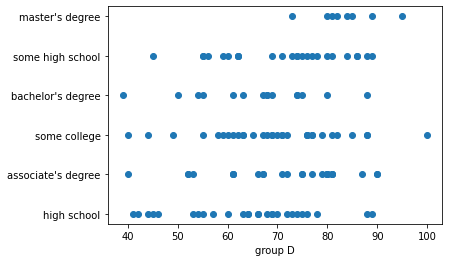

In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group D')]
y=c1['parental level of education']
x=c1['math score']
print("for group D the variation of marks with respect to groups")
print(plt.scatter(x,y))
plt.xlabel('group D')

In [0]:
male_data['math score group']=pd.cut(male_data['math score'],range(10,110,15),right=False)
pd.crosstab(c1['parental level of education'] ,male_data['math score group'])

math score group,"[25, 40)","[40, 55)","[55, 70)","[70, 85)","[85, 100)"
parental level of education,,,,,
associate's degree,0,4,6,13,3
bachelor's degree,1,2,7,4,1
high school,0,7,11,7,2
master's degree,0,0,0,5,3
some college,0,3,13,12,3
some high school,0,1,9,11,4


In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group D')]
# pd.crosstab(c1['test preparation course'],c1['math score'])
male_data['math score group']=pd.cut(c1['math score'],range(10,110,15),right=False)
# male_data['math score group'].value_counts()
print("GROUP D")
pd.crosstab(c1['test preparation course'],c1['math score group'])

GROUP D


math score group,"[25, 40)","[40, 55)","[55, 70)","[70, 85)","[85, 100)"
test preparation course,,,,,
completed,1,0,15,17,4
none,0,17,31,35,12


In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group D')]
c1['math score group']=pd.cut(c1['math score'],range(10,110,15),right=False)
d1=c1[c1['parental level of education'].str.contains('associate\'s degree')]
d2=d1[d1['test preparation course'].str.contains('none')]
(d2).head(100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
11,male,group D,associate's degree,standard,none,40,52,43,"[40, 55)"
57,male,group D,associate's degree,standard,none,52,55,49,"[40, 55)"
159,male,group D,associate's degree,free/reduced,none,66,62,64,"[55, 70)"
195,male,group D,associate's degree,standard,none,61,55,52,"[55, 70)"
235,male,group D,associate's degree,standard,none,80,75,77,"[70, 85)"
299,male,group D,associate's degree,free/reduced,none,90,87,75,"[85, 100)"
412,male,group D,associate's degree,standard,none,71,66,60,"[70, 85)"
436,male,group D,associate's degree,standard,none,75,68,64,"[70, 85)"
437,male,group D,associate's degree,free/reduced,none,75,66,73,"[70, 85)"
457,male,group D,associate's degree,free/reduced,none,53,54,48,"[40, 55)"


In [0]:
print(d2['math score group'].value_counts())
print(d2['math score'].mean())

[70, 85)     11
[40, 55)      4
[55, 70)      3
[85, 100)     2
[25, 40)      0
[10, 25)      0
Name: math score group, dtype: int64
70.85


In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group D')]
c1['math score group']=pd.cut(c1['math score'],range(10,110,15),right=False)
c1
d1=c1[c1['parental level of education'].str.contains('associate\'s degree')]
d2=d1[d1['test preparation course'].str.contains('completed')]
d2.head(100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
343,male,group D,associate's degree,standard,completed,67,72,67,"[55, 70)"
409,male,group D,associate's degree,standard,completed,87,84,85,"[85, 100)"
541,male,group D,associate's degree,free/reduced,completed,79,82,80,"[70, 85)"
669,male,group D,associate's degree,standard,completed,81,72,77,"[70, 85)"
898,male,group D,associate's degree,standard,completed,67,54,63,"[55, 70)"
932,male,group D,associate's degree,free/reduced,completed,61,71,73,"[55, 70)"


In [0]:
print(d2['math score group'].value_counts())
print(d2['math score'].mean())

[55, 70)     3
[70, 85)     2
[85, 100)    1
[40, 55)     0
[25, 40)     0
[10, 25)     0
Name: math score group, dtype: int64
73.66666666666667


In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group D')]
c1['math score group']=pd.cut(c1['math score'],range(10,110,15),right=False)
c1
d1=c1[c1['parental level of education'].str.contains('master\'s degree')]
d2=d1[d1['test preparation course'].str.contains('completed')]
(d2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
604,male,group D,master's degree,free/reduced,completed,84,89,90,"[70, 85)"


In [0]:
d2=d1[d1['test preparation course'].str.contains('none')]
(d2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
128,male,group D,master's degree,standard,none,82,82,74,"[70, 85)"
130,male,group D,master's degree,standard,none,89,84,82,"[85, 100)"
253,male,group D,master's degree,standard,none,80,80,72,"[70, 85)"
389,male,group D,master's degree,standard,none,73,70,75,"[70, 85)"
618,male,group D,master's degree,standard,none,95,81,84,"[85, 100)"
713,male,group D,master's degree,standard,none,81,81,84,"[70, 85)"
900,male,group D,master's degree,standard,none,85,84,89,"[85, 100)"


In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group D')]
c1['math score group']=pd.cut(c1['math score'],range(10,110,15),right=False)
c1
d1=c1[c1['parental level of education'].str.contains('bachelor\'s degree')]
d2=d1[d1['test preparation course'].str.contains('completed')]
(d2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
24,male,group D,bachelor's degree,free/reduced,completed,74,71,80,"[70, 85)"
101,male,group D,bachelor's degree,standard,completed,68,74,74,"[55, 70)"
134,male,group D,bachelor's degree,free/reduced,completed,74,79,75,"[70, 85)"
312,male,group D,bachelor's degree,standard,completed,67,61,68,"[55, 70)"
817,male,group D,bachelor's degree,free/reduced,completed,61,70,76,"[55, 70)"
862,male,group D,bachelor's degree,free/reduced,completed,39,42,38,"[25, 40)"


In [0]:
print(d2['math score'].mean())
print(d2['math score group'].value_counts())

63.833333333333336
[55, 70)     3
[70, 85)     2
[25, 40)     1
[85, 100)    0
[40, 55)     0
[10, 25)     0
Name: math score group, dtype: int64


In [0]:
d2=d1[d1['test preparation course'].str.contains('none')]
d2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
153,male,group D,bachelor's degree,standard,none,54,49,47,"[40, 55)"
236,male,group D,bachelor's degree,free/reduced,none,63,66,67,"[55, 70)"
522,male,group D,bachelor's degree,standard,none,69,58,57,"[55, 70)"
569,male,group D,bachelor's degree,free/reduced,none,68,68,67,"[55, 70)"
617,male,group D,bachelor's degree,standard,none,88,78,83,"[85, 100)"
740,male,group D,bachelor's degree,standard,none,80,73,72,"[70, 85)"
771,male,group D,bachelor's degree,standard,none,75,73,74,"[70, 85)"
883,male,group D,bachelor's degree,free/reduced,none,55,46,44,"[55, 70)"
910,male,group D,bachelor's degree,free/reduced,none,50,42,48,"[40, 55)"


In [0]:
print(d2['math score group'].value_counts())
print(d2['math score'].mean())

[55, 70)     4
[70, 85)     2
[40, 55)     2
[85, 100)    1
[25, 40)     0
[10, 25)     0
Name: math score group, dtype: int64
66.88888888888889


In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group D')]
c1['math score group']=pd.cut(c1['math score'],range(10,115,15),right=False)
c1
d1=c1[c1['parental level of education'].str.contains('some college')]
d2=d1[d1['test preparation course'].str.contains('completed')]
(d2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
58,male,group D,some college,standard,completed,58,59,58,"[55.0, 70.0)"
71,male,group D,some college,standard,completed,63,55,63,"[55.0, 70.0)"
127,male,group D,some college,standard,completed,65,77,74,"[55.0, 70.0)"
139,male,group D,some college,standard,completed,71,61,69,"[70.0, 85.0)"
191,male,group D,some college,standard,completed,76,83,79,"[70.0, 85.0)"
193,male,group D,some college,standard,completed,77,62,62,"[70.0, 85.0)"
610,male,group D,some college,free/reduced,completed,69,60,63,"[55.0, 70.0)"
625,male,group D,some college,standard,completed,100,97,99,NaN
865,male,group D,some college,standard,completed,82,82,88,"[70.0, 85.0)"
938,male,group D,some college,standard,completed,85,81,85,"[85.0, 100.0)"


In [0]:
d2['math score group'].value_counts()

[70, 85)     4
[55, 70)     4
[85, 100)    1
[40, 55)     0
[25, 40)     0
[10, 25)     0
Name: math score group, dtype: int64

In [0]:
d2=d1[d1['test preparation course'].str.contains('none')]
(d2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
22,male,group D,some college,standard,none,44,54,53,"[40, 55)"
33,male,group D,some college,standard,none,40,42,38,"[40, 55)"
144,male,group D,some college,standard,none,88,73,78,"[85, 100)"
230,male,group D,some college,standard,none,76,64,66,"[70, 85)"
344,male,group D,some college,standard,none,79,73,67,"[70, 85)"
358,male,group D,some college,free/reduced,none,59,62,61,"[55, 70)"
418,male,group D,some college,standard,none,68,59,62,"[55, 70)"
446,male,group D,some college,free/reduced,none,69,66,60,"[55, 70)"
486,male,group D,some college,free/reduced,none,61,47,56,"[55, 70)"
510,male,group D,some college,standard,none,76,71,73,"[70, 85)"


In [0]:
d2['math score group'].value_counts()

[55, 70)     9
[70, 85)     8
[40, 55)     3
[85, 100)    2
[25, 40)     0
[10, 25)     0
Name: math score group, dtype: int64

In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group D')]
c1['math score group']=pd.cut(c1['math score'],range(10,110,15),right=False)
c1
d1=c1[c1['parental level of education'].str.contains('high school')]
d2=d1[d1['test preparation course'].str.contains('completed')]
(d2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
8,male,group D,high school,free/reduced,completed,64,64,67,"[55, 70)"
187,male,group D,some high school,standard,completed,62,66,68,"[55, 70)"
205,male,group D,some high school,standard,completed,74,71,78,"[70, 85)"
210,male,group D,some high school,free/reduced,completed,80,79,79,"[70, 85)"
240,male,group D,high school,free/reduced,completed,73,68,66,"[70, 85)"
294,male,group D,high school,free/reduced,completed,78,77,80,"[70, 85)"
336,male,group D,some high school,standard,completed,76,70,69,"[70, 85)"
439,male,group D,some high school,standard,completed,89,88,82,"[85, 100)"
495,male,group D,high school,standard,completed,68,64,66,"[55, 70)"
721,male,group D,some high school,free/reduced,completed,55,59,59,"[55, 70)"


In [0]:
d2=d1[d1['test preparation course'].str.contains('none')]
(d2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
20,male,group D,high school,standard,none,66,69,63,"[55, 70)"
53,male,group D,high school,standard,none,88,78,75,"[85, 100)"
66,male,group D,some high school,free/reduced,none,45,37,37,"[40, 55)"
84,male,group D,high school,free/reduced,none,42,39,34,"[40, 55)"
123,male,group D,high school,free/reduced,none,63,57,56,"[55, 70)"
154,male,group D,some high school,standard,none,62,67,61,"[55, 70)"
223,male,group D,some high school,standard,none,86,80,75,"[85, 100)"
227,male,group D,high school,standard,none,57,50,54,"[55, 70)"
244,male,group D,some high school,standard,none,75,74,69,"[70, 85)"
254,male,group D,high school,standard,none,54,52,52,"[40, 55)"


In [0]:
d2['math score group'].value_counts()

[55, 70)     15
[70, 85)     10
[40, 55)      8
[85, 100)     4
[25, 40)      0
[10, 25)      0
Name: math score group, dtype: int64

In [0]:
print("GROUP E")
group_a_score=male_data[male_data['race/ethnicity'].str.contains('group E')].iloc[:,5:6]
group_a_score.describe(include="all")

GROUP E


,math score
count,71.000000
mean,76.746479
std,14.298570
min,30.000000
25%,68.500000
50%,78.000000
75%,87.000000
max,100.000000


for group E the variation of marks with respect to groups


Text(0.5, 0, 'group E')

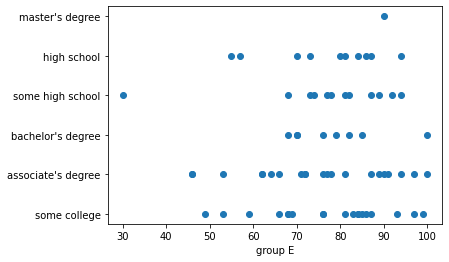

In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group E')]
y=c1['parental level of education']
x=c1['math score']
print("for group E the variation of marks with respect to groups")
print(plt.scatter(x,y))
plt.xlabel('group E')

In [0]:
male_data['math score group']=pd.cut(male_data['math score'],range(10,110,15),right=False)
pd.crosstab(c1['parental level of education'] ,male_data['math score group'])

math score group,"[25, 40)","[40, 55)","[55, 70)","[70, 85)","[85, 100)"
parental level of education,,,,,
associate's degree,0,3,4,7,6
bachelor's degree,0,0,1,5,1
high school,0,0,2,5,3
master's degree,0,0,0,0,1
some college,0,2,5,6,6
some high school,1,0,1,6,4


In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group E')]

pd.crosstab(c1['test preparation course'],c1['math score'])
male_data['math score group']=pd.cut(c1['math score'],range(10,110,15),right=False)
# male_data['math score group'].value_counts()
print("GROUP E")
pd.crosstab(c1['test preparation course'],c1['math score group'])

GROUP E


math score group,"[25, 40)","[40, 55)","[55, 70)","[70, 85)","[85, 100)"
test preparation course,,,,,
completed,0,2,5,16,11
none,1,3,8,13,10


In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group E')]
c1['math score group']=pd.cut(c1['math score'],range(10,110,15),right=False)
d1=c1[c1['parental level of education'].str.contains('associate\'s degree')]
d2=d1[d1['test preparation course'].str.contains('none')]
(d2).head(100)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
83,male,group E,associate's degree,standard,none,72,64,63,"[70, 85)"
246,male,group E,associate's degree,standard,none,89,76,74,"[85, 100)"
349,male,group E,associate's degree,standard,none,87,74,76,"[85, 100)"
375,male,group E,associate's degree,free/reduced,none,46,43,41,"[40, 55)"
479,male,group E,associate's degree,standard,none,76,71,67,"[70, 85)"
554,male,group E,associate's degree,standard,none,53,45,40,"[40, 55)"
873,male,group E,associate's degree,free/reduced,none,90,90,82,"[85, 100)"
926,male,group E,associate's degree,free/reduced,none,64,56,52,"[55, 70)"
955,male,group E,associate's degree,standard,none,72,57,62,"[70, 85)"


In [0]:
print(d2['math score group'].value_counts())
print(d2['math score'].mean())

[85, 100)    3
[70, 85)     3
[40, 55)     2
[55, 70)     1
[25, 40)     0
[10, 25)     0
Name: math score group, dtype: int64
72.11111111111111


In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group E')]
c1['math score group']=pd.cut(c1['math score'],range(10,135,15),right=False)
c1
d1=c1[c1['parental level of education'].str.contains('associate\'s degree')]
d2=d1[d1['test preparation course'].str.contains('completed')]
d2.head(100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
35,male,group E,associate's degree,standard,completed,81,81,79,"[70, 85)"
51,male,group E,associate's degree,free/reduced,completed,77,69,68,"[70, 85)"
107,male,group E,associate's degree,standard,completed,66,63,64,"[55, 70)"
149,male,group E,associate's degree,free/reduced,completed,100,100,93,"[100, 115)"
286,male,group E,associate's degree,standard,completed,97,82,88,"[85, 100)"
297,male,group E,associate's degree,standard,completed,71,74,68,"[70, 85)"
332,male,group E,associate's degree,standard,completed,62,56,53,"[55, 70)"
532,male,group E,associate's degree,standard,completed,62,61,58,"[55, 70)"
719,male,group E,associate's degree,free/reduced,completed,91,73,80,"[85, 100)"
779,male,group E,associate's degree,standard,completed,94,85,82,"[85, 100)"


In [0]:
print(d2['math score group'].value_counts())
print(d2['math score'].mean())

[70, 85)      4
[85, 100)     3
[55, 70)      3
[100, 115)    1
[40, 55)      1
[115, 130)    0
[25, 40)      0
[10, 25)      0
Name: math score group, dtype: int64
77.08333333333333


In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group E')]
c1['math score group']=pd.cut(c1['math score'],range(10,135,15),right=False)
c1
d1=c1[c1['parental level of education'].str.contains('master\'s degree')]
d2=d1[d1['test preparation course'].str.contains('completed')]
(d2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group


In [0]:
d2=d1[d1['test preparation course'].str.contains('none')]
(d2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
845,male,group E,master's degree,standard,none,90,85,84,"[85, 100)"


In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group E')]
c1['math score group']=pd.cut(c1['math score'],range(10,135,15),right=False)
c1
d1=c1[c1['parental level of education'].str.contains('bachelor\'s degree')]
d2=d1[d1['test preparation course'].str.contains('completed')]
(d2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
60,male,group E,bachelor's degree,free/reduced,completed,79,74,72,"[70, 85)"
476,male,group E,bachelor's degree,standard,completed,76,62,66,"[70, 85)"
538,male,group E,bachelor's degree,standard,completed,85,66,71,"[85, 100)"
757,male,group E,bachelor's degree,free/reduced,completed,70,68,72,"[70, 85)"
909,male,group E,bachelor's degree,standard,completed,70,64,70,"[70, 85)"
916,male,group E,bachelor's degree,standard,completed,100,100,100,"[100, 115)"


In [0]:
print(d2['math score'].mean())
print(d2['math score group'].value_counts())

80.0
[70, 85)     4
[85, 100)    1
[55, 70)     0
[40, 55)     0
[25, 40)     0
[10, 25)     0
Name: math score group, dtype: int64


In [0]:
d2=d1[d1['test preparation course'].str.contains('none')]
d2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
206,male,group E,bachelor's degree,standard,none,82,62,62,"[70, 85)"
592,male,group E,bachelor's degree,standard,none,68,68,64,"[55, 70)"


In [0]:
print(d2['math score group'].value_counts())
print(d2['math score'].mean())

[70, 85)      1
[55, 70)      1
[115, 130)    0
[100, 115)    0
[85, 100)     0
[40, 55)      0
[25, 40)      0
[10, 25)      0
Name: math score group, dtype: int64
75.0


In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group E')]
c1['math score group']=pd.cut(c1['math score'],range(10,115,15),right=False)
c1
d1=c1[c1['parental level of education'].str.contains('some college')]
d2=d1[d1['test preparation course'].str.contains('completed')]
(d2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
132,male,group E,some college,free/reduced,completed,87,74,70,"[85, 100)"
306,male,group E,some college,standard,completed,99,87,81,"[85, 100)"
411,male,group E,some college,standard,completed,84,83,78,"[70, 85)"
686,male,group E,some college,standard,completed,85,75,68,"[85, 100)"
725,male,group E,some college,standard,completed,81,74,71,"[70, 85)"
822,male,group E,some college,free/reduced,completed,49,52,51,"[40, 55)"


In [0]:
d2['math score group'].value_counts()

[85, 100)    3
[70, 85)     2
[40, 55)     1
[55, 70)     0
[25, 40)     0
[10, 25)     0
Name: math score group, dtype: int64

In [0]:
d2=d1[d1['test preparation course'].str.contains('none')]
(d2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
34,male,group E,some college,standard,none,97,87,82,"[85, 100)"
50,male,group E,some college,standard,none,53,55,48,"[40, 55)"
124,male,group E,some college,standard,none,83,80,73,"[70, 85)"
243,male,group E,some college,standard,none,59,51,43,"[55, 70)"
351,male,group E,some college,standard,none,66,57,52,"[55, 70)"
370,male,group E,some college,standard,none,84,77,71,"[70, 85)"
392,male,group E,some college,standard,none,76,67,67,"[70, 85)"
499,male,group E,some college,standard,none,76,71,72,"[70, 85)"
525,male,group E,some college,standard,none,68,60,59,"[55, 70)"
638,male,group E,some college,standard,none,86,76,74,"[85, 100)"


In [0]:
d2['math score group'].value_counts()

[55, 70)     2
[70, 85)     1
[40, 55)     1
[25, 40)     1
[85, 100)    0
[10, 25)     0
Name: math score group, dtype: int64

In [0]:
c1=male_data[male_data['race/ethnicity'].str.contains('group E')]
c1['math score group']=pd.cut(c1['math score'],range(10,110,15),right=False)
c1
d1=c1[c1['parental level of education'].str.contains('high school')]
d2=d1[d1['test preparation course'].str.contains('completed')]
(d2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
207,male,group E,high school,standard,completed,81,80,76,"[70, 85)"
214,male,group E,high school,standard,completed,87,91,81,"[85, 100)"
289,male,group E,some high school,standard,completed,77,76,77,"[70, 85)"
390,male,group E,some high school,free/reduced,completed,73,67,59,"[70, 85)"
419,male,group E,high school,free/reduced,completed,57,56,54,"[55, 70)"
545,male,group E,some high school,free/reduced,completed,78,83,80,"[70, 85)"
727,male,group E,some high school,standard,completed,68,51,57,"[55, 70)"
793,male,group E,some high school,standard,completed,89,84,77,"[85, 100)"
813,male,group E,some high school,standard,completed,87,84,76,"[85, 100)"
925,male,group E,some high school,standard,completed,74,64,60,"[70, 85)"


In [0]:
d2['math score group'].value_counts()

[70, 85)     6
[85, 100)    4
[55, 70)     2
[40, 55)     0
[25, 40)     0
[10, 25)     0
Name: math score group, dtype: int64

In [0]:
d2=d1[d1['test preparation course'].str.contains('none')]
(d2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score group
76,male,group E,some high school,standard,none,30,26,22,"[25, 40)"
137,male,group E,high school,standard,none,70,55,56,"[70, 85)"
171,male,group E,some high school,standard,none,94,88,78,"[85, 100)"
186,male,group E,high school,standard,none,80,76,65,"[70, 85)"
197,male,group E,high school,free/reduced,none,55,56,51,"[55, 70)"
233,male,group E,some high school,standard,none,92,87,78,"[85, 100)"
415,male,group E,high school,standard,none,84,73,69,"[70, 85)"
836,male,group E,high school,standard,none,73,64,57,"[70, 85)"
853,male,group E,some high school,standard,none,82,67,61,"[70, 85)"
950,male,group E,high school,standard,none,94,73,71,"[85, 100)"


In [0]:
d2['math score group'].value_counts()

[70, 85)     5
[85, 100)    3
[55, 70)     1
[25, 40)     1
[40, 55)     0
[10, 25)     0
Name: math score group, dtype: int64

In [0]:
# we have seen for maths score now let us see for reading and writing

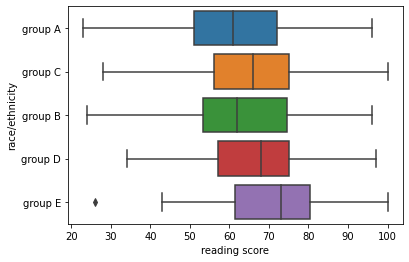

In [0]:
import seaborn as sns
sns.boxplot(y="race/ethnicity", x="reading score", data=male_data)

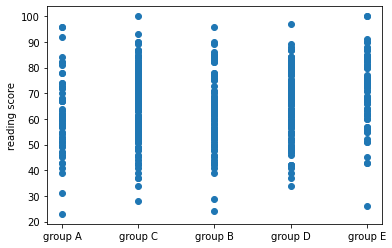

In [0]:
x=male_data['race/ethnicity']
y=male_data['reading score']
plt.ylabel('reading score')
plt.scatter(x,y)


			general trend of parental education


Text(0.5, 1.0, 'general trend on parental education')

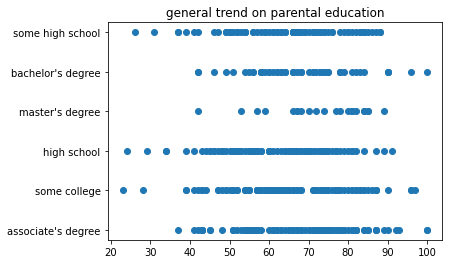

In [0]:
y=male_data['parental level of education']
x=male_data['reading score']
print("\n\t\t\tgeneral trend of parental education")
plt.title('for all groups')
print(plt.scatter(x,y))
plt.title('general trend on parental education')


In [0]:
male_data['reading score group']=pd.cut(male_data['reading score'],range(10,135,15),right=False)
pd.crosstab(male_data['parental level of education'] ,male_data['reading score group'])

reading score group,"[10, 25)","[25, 40)","[40, 55)","[55, 70)","[70, 85)","[85, 100)","[100, 115)"
parental level of education,,,,,,,
associate's degree,0,1,19,35,40,9,2
bachelor's degree,0,0,6,25,19,4,1
high school,1,4,28,37,29,3,0
master's degree,0,0,2,6,12,3,0
some college,1,3,19,44,32,9,0
some high school,0,5,18,33,27,5,0


AxesSubplot(0.125,0.125;0.775x0.755)


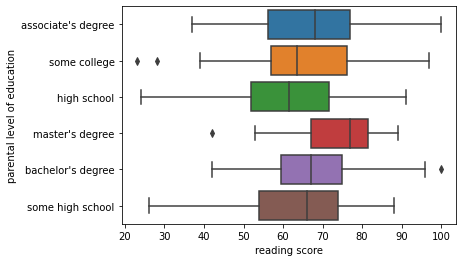

In [0]:
print(sns.boxplot(y="parental level of education", x="reading score", data=male_data))


In [0]:
pd.crosstab(male_data['test preparation course'],male_data['reading score'])
male_data['reading score group']=pd.cut(male_data['reading score'],range(10,135,15),right=False)
c=pd.crosstab(male_data['test preparation course'],male_data['reading score group'])
c

reading score group,"[10, 25)","[25, 40)","[40, 55)","[55, 70)","[70, 85)","[85, 100)","[100, 115)"
test preparation course,,,,,,,
completed,0,1,26,54,71,19,3
none,2,12,66,126,88,14,0


In [0]:
pd.crosstab(male_data['lunch'],male_data['reading score'])
male_data['reading score group']=pd.cut(male_data['reading score'],range(10,135,15),right=False)
# male_data['math score group'].value_counts()
c=pd.crosstab(male_data['lunch'],male_data['reading score group'])
c


reading score group,"[10, 25)","[25, 40)","[40, 55)","[55, 70)","[70, 85)","[85, 100)","[100, 115)"
lunch,,,,,,,
free/reduced,2,8,35,73,42,5,1
standard,0,5,57,107,117,28,2


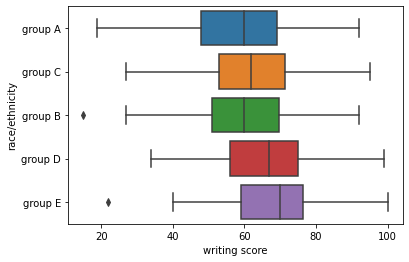

In [0]:
#now to check for writing score
sns.boxplot(y="race/ethnicity", x="writing score", data=male_data)

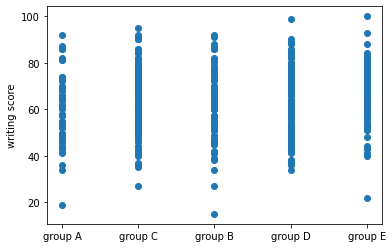

In [0]:
x=male_data['race/ethnicity']
y=male_data['writing score']
plt.ylabel('writing score')
plt.scatter(x,y)


			general trend of parental education


Text(0.5, 1.0, 'general trend on parental education')

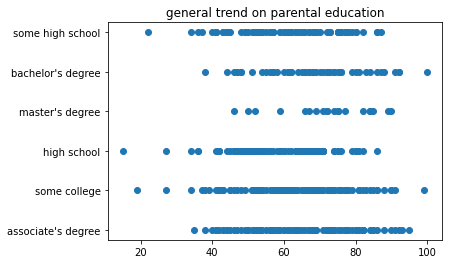

In [0]:
y=male_data['parental level of education']
x=male_data['writing score']
print("\n\t\t\tgeneral trend of parental education")
plt.title('for all groups')
print(plt.scatter(x,y))
plt.title('general trend on parental education')

In [0]:
male_data['writing score group']=pd.cut(male_data['writing score'],range(10,135,15),right=False)
pd.crosstab(male_data['parental level of education'] ,male_data['writing score group'])

writing score group,"[10, 25)","[25, 40)","[40, 55)","[55, 70)","[70, 85)","[85, 100)","[100, 115)"
parental level of education,,,,,,,
associate's degree,0,2,25,36,34,9,0
bachelor's degree,0,1,8,22,17,6,1
high school,1,4,39,39,18,1,0
master's degree,0,0,3,4,13,3,0
some college,1,5,25,39,30,8,0
some high school,1,3,24,36,21,3,0


AxesSubplot(0.125,0.125;0.775x0.755)


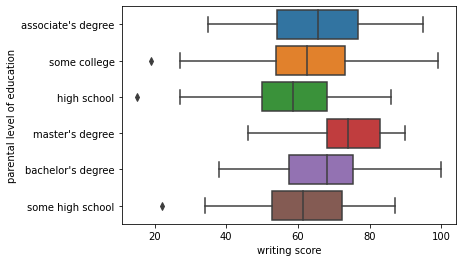

In [0]:
print(sns.boxplot(y="parental level of education", x="writing score", data=male_data))


In [0]:
pd.crosstab(male_data['test preparation course'],male_data['writing score'])
male_data['writing score group']=pd.cut(male_data['writing score'],range(10,135,15),right=False)
c=pd.crosstab(male_data['test preparation course'],male_data['writing score group'])
c

writing score group,"[10, 25)","[25, 40)","[40, 55)","[55, 70)","[70, 85)","[85, 100)","[100, 115)"
test preparation course,,,,,,,
completed,0,1,27,58,63,24,1
none,3,14,97,118,70,6,0


In [0]:
pd.crosstab(male_data['lunch'],male_data['writing score'])
male_data['writing score group']=pd.cut(male_data['writing score'],range(10,135,15),right=False)
# male_data['math score group'].value_counts()
c=pd.crosstab(male_data['lunch'],male_data['writing score group'])
c

writing score group,"[10, 25)","[25, 40)","[40, 55)","[55, 70)","[70, 85)","[85, 100)","[100, 115)"
lunch,,,,,,,
free/reduced,2,10,54,59,38,3,0
standard,1,5,70,117,95,27,1


In [0]:
#now lets look at overall picture of the data including both male and female

total=pd.read_csv('students.csv')

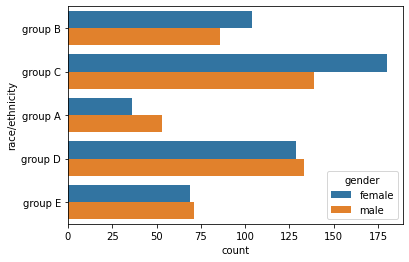

In [0]:
sns.countplot(y="race/ethnicity" ,data=total,hue="gender")

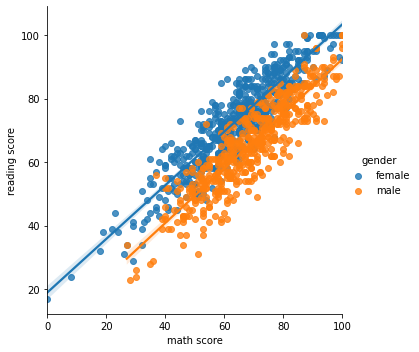

In [0]:
sns.lmplot('math score','reading score',data=total,hue="gender")

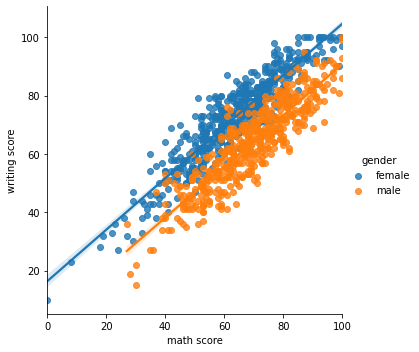

In [0]:
sns.lmplot('math score','writing score',data=total,hue="gender")

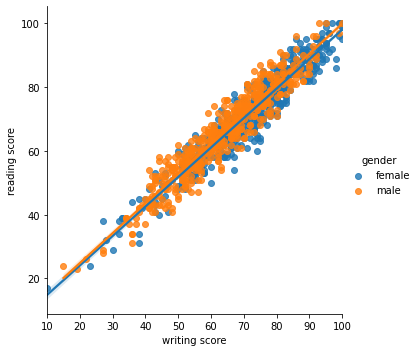

In [0]:
sns.lmplot('writing score','reading score',data=total,hue="gender")

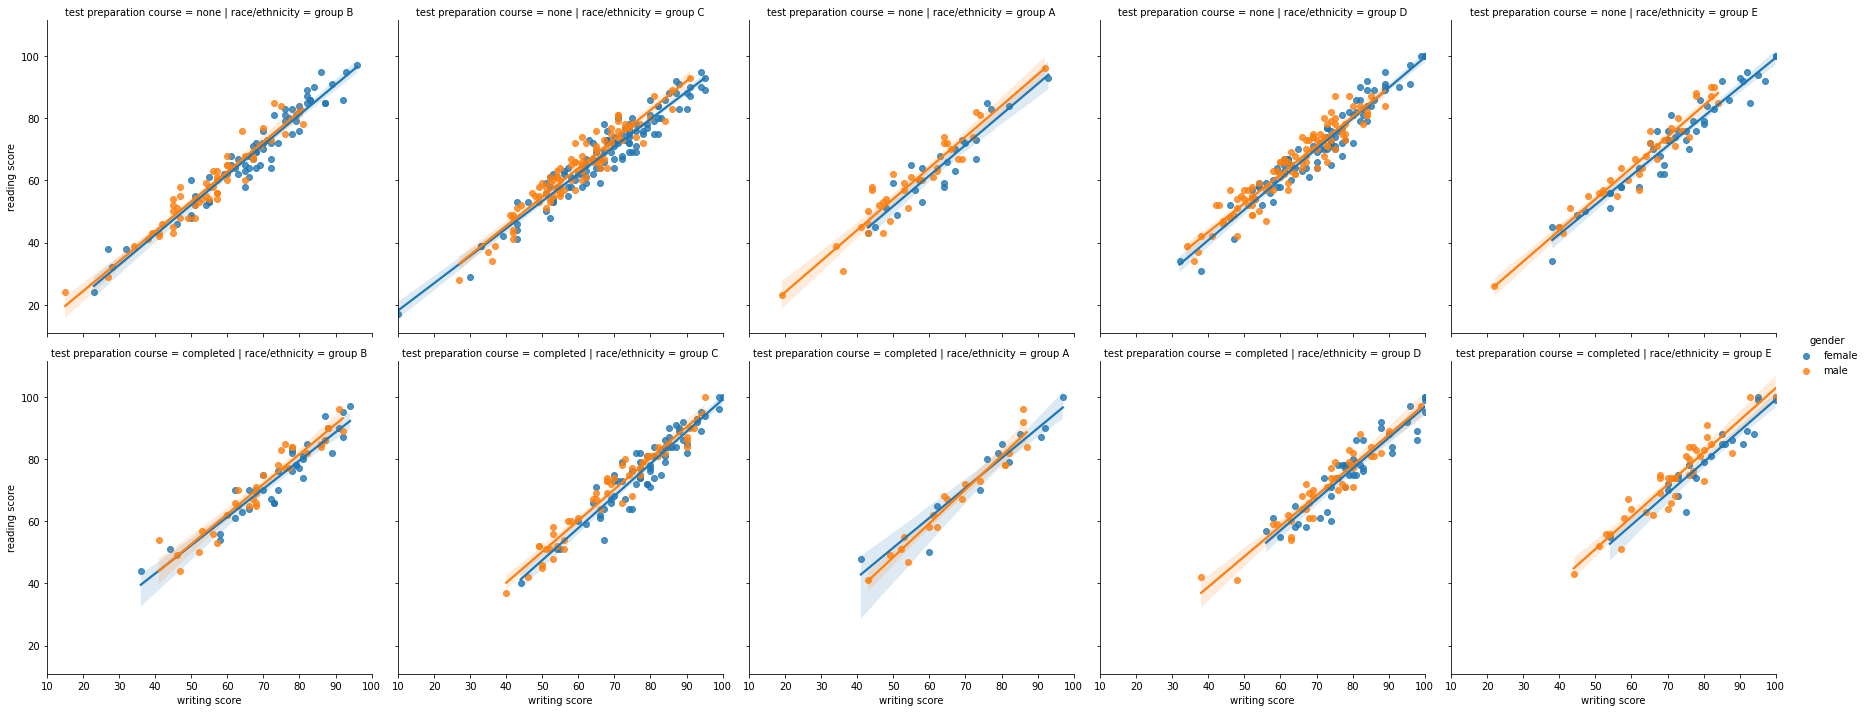

In [0]:
sns.lmplot('writing score','reading score',data=total,hue="gender",row="test preparation course",col="race/ethnicity")

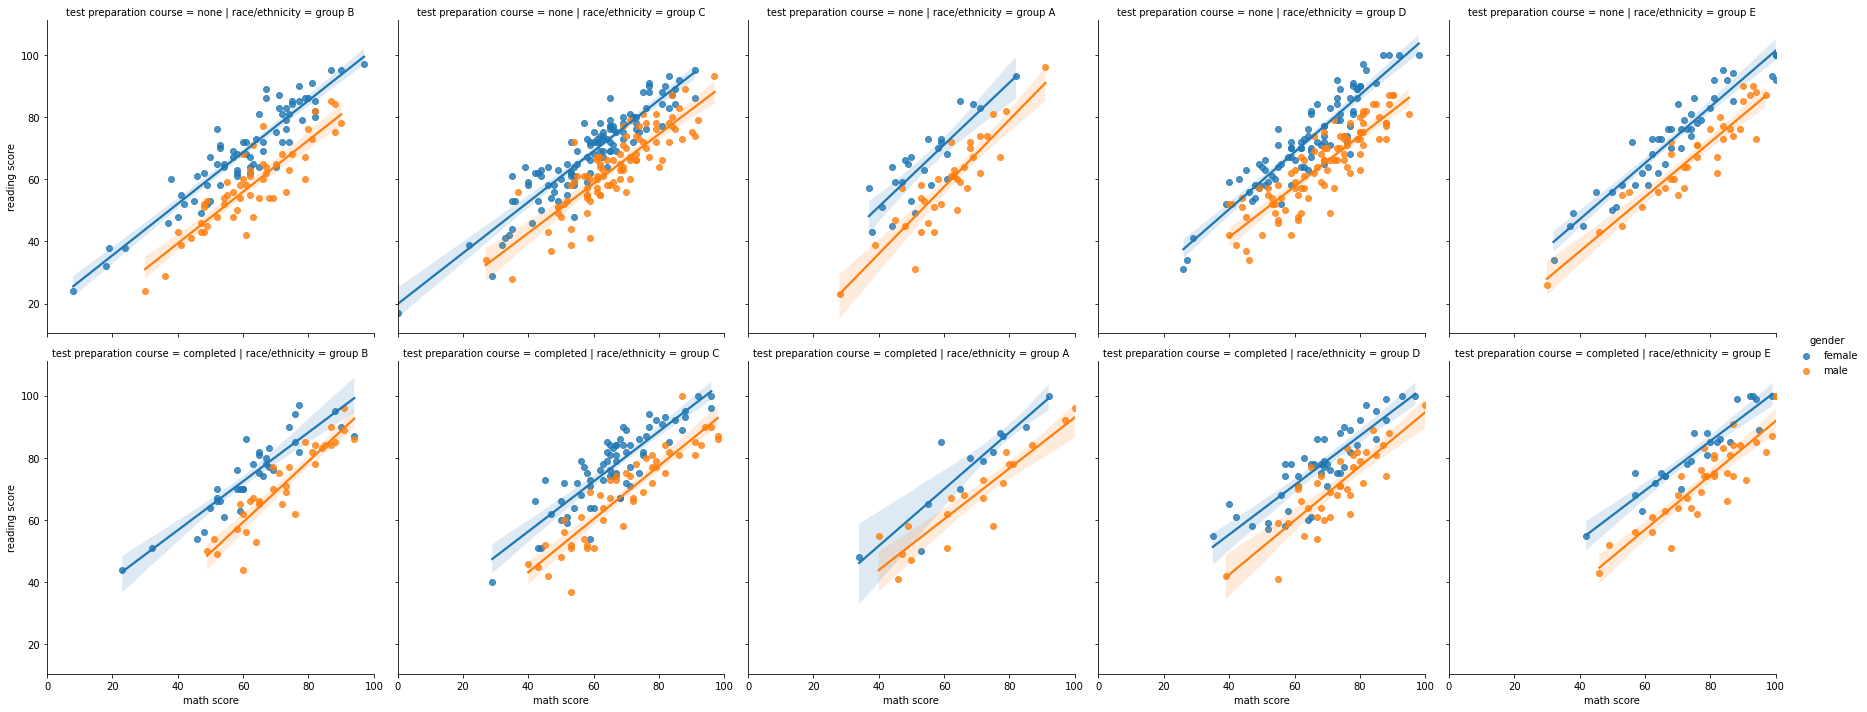

In [0]:
sns.lmplot('math score','reading score',data=total,hue="gender",row="test preparation course",col="race/ethnicity")

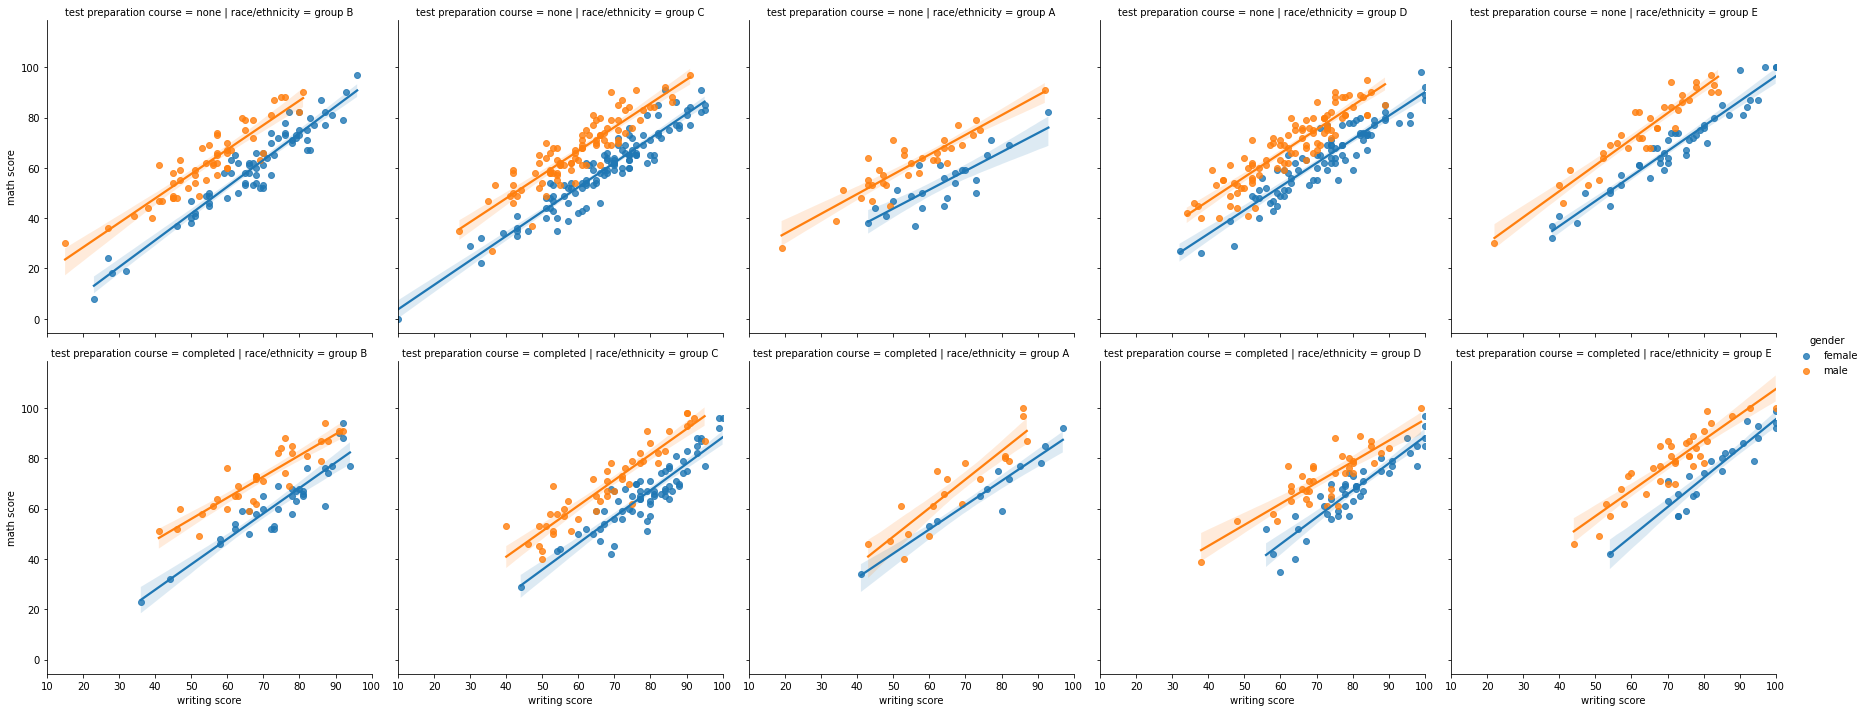

In [0]:
sns.lmplot('writing score','math score',data=total,hue="gender",row="test preparation course",col="race/ethnicity")

<Figure size 720x2880 with 0 Axes>

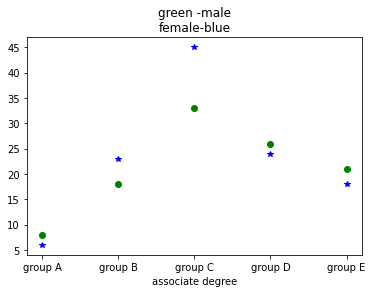

<Figure size 720x2880 with 0 Axes>

In [0]:
male_data=table[table.gender=='male'].head(1000)
female_data=table[table.gender=='female'].head(1000)
relation1 = pd.crosstab(male_data['race/ethnicity'],male_data['parental level of education'])
relation2 = pd.crosstab(female_data['race/ethnicity'],female_data['parental level of education'])
index1=relation1.index
index2=relation2.index
y2=relation2['associate\'s degree']
y1=relation1['associate\'s degree']
# plt.subplot(1,2,1)
# figure, axes = plt.subplots(2,1)
plt.plot(index1,y1,'go')
plt.title('green -male\nfemale-blue')
plt.plot(index2,y2,'b*')
plt.xlabel('associate degree')
plt.figure(figsize=(10,40))
